In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("disturbance.csv",low_memory=False)

In [3]:
data.describe()

,Mean,S.D1,Variance,Kurtotis1,Skew1,Entrophy1,Class
count,1.509000e+03,1.509000e+03,1.509000e+03,1509.000000,1509.000000,1509.000000,1509.000000
mean,8.175738e+04,2.573704e+07,1.981729e+16,562.421964,1666.688695,93.972843,2.708416
std,9.886919e+05,2.660106e+08,3.265859e+17,313.261771,616.129838,47.369375,2.541134
min,2.539646e-02,1.536493e+01,1.180405e+02,97.177303,473.262118,0.000000,0.000000
25%,6.491403e+00,3.391733e+03,6.461869e+05,297.050424,1206.522756,52.456951,0.000000
50%,3.027101e+02,1.286802e+05,5.769308e+08,527.385768,1701.768287,103.613821,2.000000
75%,2.627755e+03,1.129686e+06,2.655800e+11,774.984713,2185.405591,125.890264,5.000000
max,2.434822e+07,5.733978e+09,8.220000e+18,1701.273826,3286.372559,277.351334,8.000000


In [4]:
Y=data.pop("Class")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
X_2d = tsne.fit_transform(data)

In [9]:
target_names=["0","1","2","3","4","5","6","7","8"]

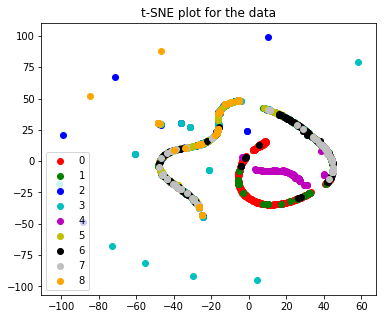

In [10]:
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE.fig', format='eps', dpi=1000)
plt.savefig('t-SNE.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [14]:
from numpy import argmax
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 42)
nb_classes = 9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [15]:
print(X_train.shape[0])
print(X_test.shape[0])
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

1131
378
6 dims
Building model...


In [16]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

#print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
#print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_train)/range_train

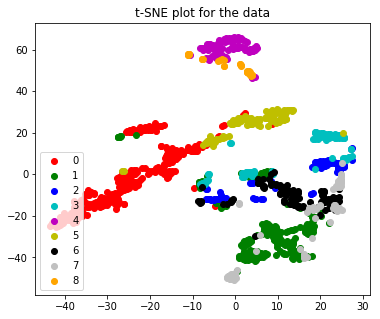

In [18]:
X_2d = tsne.fit_transform(X_train_scaled)
target_names=["0","1","2","3","4","5","6","7","8"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled_train.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled_train.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

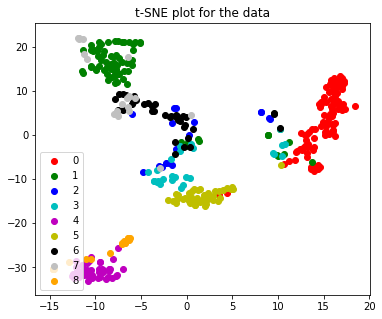

In [19]:
X_2d = tsne.fit_transform(X_test_scaled)
target_names=["0","1","2","3","4","5","6","7","8"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled_testdata.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled_testdata.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [21]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('relu'))
m.add(Dense(25))
m.add(Activation('softmax'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist1=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])


Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 2s 2ms/step - loss: 2.1602 - acc: 0.2847 - val_loss: 2.1476 - val_acc: 0.2593
Epoch 2/3000
1131/1131 [==============================] - 0s 93us/step - loss: 2.1276 - acc: 0.2847 - val_loss: 2.1181 - val_acc: 0.2593
Epoch 3/3000
1131/1131 [==============================] - 0s 85us/step - loss: 2.0955 - acc: 0.2847 - val_loss: 2.0871 - val_acc: 0.2593
Epoch 4/3000
1131/1131 [==============================] - 0s 75us/step - loss: 2.0620 - acc: 0.2847 - val_loss: 2.0569 - val_acc: 0.2593
Epoch 5/3000
1131/1131 [==============================] - 0s 67us/step - loss: 2.0300 - acc: 0.2847 - val_loss: 2.0288 - val_acc: 0.2593
Epoch 6/3000
1131/1131 [==============================] - 0s 67us/step - loss: 2.0012 - acc: 0.2847 - val_loss: 2.0009 - val_acc: 0.2593
Epoch 7/3000
1131/1131 [==============================] - 0s 60us/step - loss: 1.9730 - acc: 0.2847 - val_loss: 1.9712 - val_acc: 0.

1131/1131 [==============================] - 0s 67us/step - loss: 1.3166 - acc: 0.5880 - val_loss: 1.3144 - val_acc: 0.5979
Epoch 61/3000
1131/1131 [==============================] - 0s 67us/step - loss: 1.3030 - acc: 0.6039 - val_loss: 1.2984 - val_acc: 0.6032
Epoch 62/3000
1131/1131 [==============================] - 0s 57us/step - loss: 1.2893 - acc: 0.6127 - val_loss: 1.2906 - val_acc: 0.6085
Epoch 63/3000
1131/1131 [==============================] - 0s 64us/step - loss: 1.2743 - acc: 0.6260 - val_loss: 1.2727 - val_acc: 0.6243
Epoch 64/3000
1131/1131 [==============================] - 0s 53us/step - loss: 1.2599 - acc: 0.6401 - val_loss: 1.2613 - val_acc: 0.6217
Epoch 65/3000
1131/1131 [==============================] - 0s 64us/step - loss: 1.2460 - acc: 0.6401 - val_loss: 1.2483 - val_acc: 0.6190
Epoch 66/3000
1131/1131 [==============================] - 0s 60us/step - loss: 1.2328 - acc: 0.6490 - val_loss: 1.2374 - val_acc: 0.6190
Epoch 67/3000
1131/1131 [=======================

1131/1131 [==============================] - 0s 52us/step - loss: 0.9004 - acc: 0.7277 - val_loss: 0.9030 - val_acc: 0.7460
Epoch 120/3000
1131/1131 [==============================] - 0s 54us/step - loss: 0.8976 - acc: 0.7524 - val_loss: 0.8975 - val_acc: 0.7540
Epoch 121/3000
1131/1131 [==============================] - 0s 55us/step - loss: 0.8914 - acc: 0.7630 - val_loss: 0.8923 - val_acc: 0.7487
Epoch 122/3000
1131/1131 [==============================] - 0s 41us/step - loss: 0.8878 - acc: 0.7639 - val_loss: 0.8884 - val_acc: 0.7487
Epoch 123/3000
1131/1131 [==============================] - 0s 63us/step - loss: 0.8828 - acc: 0.7630 - val_loss: 0.8878 - val_acc: 0.7646
Epoch 124/3000
1131/1131 [==============================] - 0s 51us/step - loss: 0.8788 - acc: 0.7737 - val_loss: 0.8824 - val_acc: 0.7566
Epoch 125/3000
1131/1131 [==============================] - 0s 49us/step - loss: 0.8749 - acc: 0.7551 - val_loss: 0.8777 - val_acc: 0.7540
Epoch 126/3000
1131/1131 [================

1131/1131 [==============================] - 0s 49us/step - loss: 0.7358 - acc: 0.7905 - val_loss: 0.7475 - val_acc: 0.7884
Epoch 179/3000
1131/1131 [==============================] - 0s 44us/step - loss: 0.7340 - acc: 0.7922 - val_loss: 0.7498 - val_acc: 0.7884
Epoch 180/3000
1131/1131 [==============================] - 0s 49us/step - loss: 0.7333 - acc: 0.7940 - val_loss: 0.7459 - val_acc: 0.7910
Epoch 181/3000
1131/1131 [==============================] - 0s 55us/step - loss: 0.7307 - acc: 0.7922 - val_loss: 0.7424 - val_acc: 0.7884
Epoch 182/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.7291 - acc: 0.7887 - val_loss: 0.7445 - val_acc: 0.7937
Epoch 183/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.7268 - acc: 0.7931 - val_loss: 0.7413 - val_acc: 0.7910
Epoch 184/3000
1131/1131 [==============================] - 0s 65us/step - loss: 0.7263 - acc: 0.8002 - val_loss: 0.7393 - val_acc: 0.7910
Epoch 185/3000
1131/1131 [================

1131/1131 [==============================] - 0s 46us/step - loss: 0.6446 - acc: 0.8046 - val_loss: 0.6607 - val_acc: 0.7910
Epoch 238/3000
1131/1131 [==============================] - 0s 41us/step - loss: 0.6430 - acc: 0.8117 - val_loss: 0.6629 - val_acc: 0.7884
Epoch 239/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.6421 - acc: 0.8028 - val_loss: 0.6588 - val_acc: 0.7884
Epoch 240/3000
1131/1131 [==============================] - 0s 51us/step - loss: 0.6399 - acc: 0.8073 - val_loss: 0.6569 - val_acc: 0.7910
Epoch 241/3000
1131/1131 [==============================] - 0s 58us/step - loss: 0.6386 - acc: 0.8081 - val_loss: 0.6581 - val_acc: 0.7884
Epoch 242/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.6380 - acc: 0.8037 - val_loss: 0.6540 - val_acc: 0.7884
Epoch 243/3000
1131/1131 [==============================] - 0s 56us/step - loss: 0.6362 - acc: 0.8037 - val_loss: 0.6526 - val_acc: 0.8042
Epoch 244/3000
1131/1131 [================

Epoch 296/3000
1131/1131 [==============================] - 0s 61us/step - loss: 0.5679 - acc: 0.8064 - val_loss: 0.5926 - val_acc: 0.7910
Epoch 297/3000
1131/1131 [==============================] - 0s 41us/step - loss: 0.5682 - acc: 0.8073 - val_loss: 0.5906 - val_acc: 0.7963
Epoch 298/3000
1131/1131 [==============================] - 0s 59us/step - loss: 0.5696 - acc: 0.8037 - val_loss: 0.5843 - val_acc: 0.7989
Epoch 299/3000
1131/1131 [==============================] - 0s 46us/step - loss: 0.5655 - acc: 0.8081 - val_loss: 0.5850 - val_acc: 0.7989
Epoch 300/3000
1131/1131 [==============================] - 0s 43us/step - loss: 0.5644 - acc: 0.8046 - val_loss: 0.5847 - val_acc: 0.7937
Epoch 301/3000
1131/1131 [==============================] - 0s 41us/step - loss: 0.5626 - acc: 0.8028 - val_loss: 0.5858 - val_acc: 0.7963
Epoch 302/3000
1131/1131 [==============================] - 0s 56us/step - loss: 0.5614 - acc: 0.8055 - val_loss: 0.5795 - val_acc: 0.7937
Epoch 303/3000
1131/1131 [=

Epoch 355/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.5106 - acc: 0.8267 - val_loss: 0.5352 - val_acc: 0.8148
Epoch 356/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.5097 - acc: 0.8267 - val_loss: 0.5379 - val_acc: 0.8175
Epoch 357/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.5099 - acc: 0.8294 - val_loss: 0.5362 - val_acc: 0.8095
Epoch 358/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.5097 - acc: 0.8276 - val_loss: 0.5304 - val_acc: 0.8175
Epoch 359/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.5073 - acc: 0.8240 - val_loss: 0.5301 - val_acc: 0.8175
Epoch 360/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.5070 - acc: 0.8249 - val_loss: 0.5289 - val_acc: 0.8122
Epoch 361/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.5060 - acc: 0.8240 - val_loss: 0.5290 - val_acc: 0.8148
Epoch 362/3000
1131/1131 [

Epoch 414/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.4684 - acc: 0.8338 - val_loss: 0.4970 - val_acc: 0.8122
Epoch 415/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.4716 - acc: 0.8320 - val_loss: 0.4932 - val_acc: 0.8175
Epoch 416/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.4691 - acc: 0.8258 - val_loss: 0.4953 - val_acc: 0.8280
Epoch 417/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.4711 - acc: 0.8320 - val_loss: 0.4914 - val_acc: 0.8201
Epoch 418/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.4675 - acc: 0.8285 - val_loss: 0.4953 - val_acc: 0.8280
Epoch 419/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.4655 - acc: 0.8364 - val_loss: 0.4895 - val_acc: 0.8201
Epoch 420/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.4654 - acc: 0.8338 - val_loss: 0.4896 - val_acc: 0.8201
Epoch 421/3000
1131/1131 [=

Epoch 473/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.4226 - acc: 0.8470 - val_loss: 0.4525 - val_acc: 0.8466
Epoch 474/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.4242 - acc: 0.8523 - val_loss: 0.4498 - val_acc: 0.8360
Epoch 475/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.4241 - acc: 0.8470 - val_loss: 0.4469 - val_acc: 0.8439
Epoch 476/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.4232 - acc: 0.8523 - val_loss: 0.4467 - val_acc: 0.8386
Epoch 477/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.4212 - acc: 0.8532 - val_loss: 0.4486 - val_acc: 0.8439
Epoch 478/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.4214 - acc: 0.8506 - val_loss: 0.4455 - val_acc: 0.8413
Epoch 479/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.4218 - acc: 0.8515 - val_loss: 0.4425 - val_acc: 0.8386
Epoch 480/3000
1131/1131 [=

Epoch 532/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3880 - acc: 0.8824 - val_loss: 0.4110 - val_acc: 0.8651
Epoch 533/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3861 - acc: 0.8798 - val_loss: 0.4121 - val_acc: 0.8598
Epoch 534/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3901 - acc: 0.8780 - val_loss: 0.4110 - val_acc: 0.8545
Epoch 535/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.3914 - acc: 0.8744 - val_loss: 0.4130 - val_acc: 0.8519
Epoch 536/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.3854 - acc: 0.8780 - val_loss: 0.4083 - val_acc: 0.8624
Epoch 537/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3864 - acc: 0.8789 - val_loss: 0.4091 - val_acc: 0.8677
Epoch 538/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3875 - acc: 0.8833 - val_loss: 0.4078 - val_acc: 0.8571
Epoch 539/3000
1131/1131 [=

1131/1131 [==============================] - 0s 60us/step - loss: 0.3694 - acc: 0.8842 - val_loss: 0.3880 - val_acc: 0.8704
Epoch 591/3000
1131/1131 [==============================] - 0s 53us/step - loss: 0.3671 - acc: 0.8798 - val_loss: 0.3893 - val_acc: 0.8730
Epoch 592/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3671 - acc: 0.8824 - val_loss: 0.3901 - val_acc: 0.8624
Epoch 593/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.3673 - acc: 0.8789 - val_loss: 0.3871 - val_acc: 0.8677
Epoch 594/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3650 - acc: 0.8815 - val_loss: 0.3874 - val_acc: 0.8677
Epoch 595/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3662 - acc: 0.8859 - val_loss: 0.3891 - val_acc: 0.8704
Epoch 596/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3664 - acc: 0.8877 - val_loss: 0.3859 - val_acc: 0.8704
Epoch 597/3000
1131/1131 [================

1131/1131 [==============================] - 0s 64us/step - loss: 0.3536 - acc: 0.8824 - val_loss: 0.3710 - val_acc: 0.8704
Epoch 650/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3544 - acc: 0.8842 - val_loss: 0.3707 - val_acc: 0.8757
Epoch 651/3000
1131/1131 [==============================] - 0s 66us/step - loss: 0.3532 - acc: 0.8833 - val_loss: 0.3751 - val_acc: 0.8677
Epoch 652/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3510 - acc: 0.8842 - val_loss: 0.3726 - val_acc: 0.8624
Epoch 653/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.3529 - acc: 0.8868 - val_loss: 0.3724 - val_acc: 0.8730
Epoch 654/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3527 - acc: 0.8824 - val_loss: 0.3690 - val_acc: 0.8730
Epoch 655/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.3516 - acc: 0.8824 - val_loss: 0.3702 - val_acc: 0.8651
Epoch 656/3000
1131/1131 [================

Epoch 708/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.3407 - acc: 0.8868 - val_loss: 0.3574 - val_acc: 0.8704
Epoch 709/3000
1131/1131 [==============================] - ETA: 0s - loss: 0.3542 - acc: 0.871 - 0s 88us/step - loss: 0.3422 - acc: 0.8815 - val_loss: 0.3600 - val_acc: 0.8624
Epoch 710/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.3417 - acc: 0.8833 - val_loss: 0.3590 - val_acc: 0.8677
Epoch 711/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.3442 - acc: 0.8851 - val_loss: 0.3588 - val_acc: 0.8677
Epoch 712/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.3392 - acc: 0.8877 - val_loss: 0.3743 - val_acc: 0.8677
Epoch 713/3000
1131/1131 [==============================] - 0s 110us/step - loss: 0.3434 - acc: 0.8859 - val_loss: 0.3682 - val_acc: 0.8730
Epoch 714/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.3400 - acc: 0.8815 - val_loss: 0.3570 - v

1131/1131 [==============================] - 0s 64us/step - loss: 0.3309 - acc: 0.8886 - val_loss: 0.3467 - val_acc: 0.8651
Epoch 767/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.3341 - acc: 0.8921 - val_loss: 0.3454 - val_acc: 0.8783
Epoch 768/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3307 - acc: 0.8868 - val_loss: 0.3465 - val_acc: 0.8704
Epoch 769/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3327 - acc: 0.8868 - val_loss: 0.3452 - val_acc: 0.8704
Epoch 770/3000
1131/1131 [==============================] - 0s 65us/step - loss: 0.3306 - acc: 0.8877 - val_loss: 0.3484 - val_acc: 0.8704
Epoch 771/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3313 - acc: 0.8851 - val_loss: 0.3464 - val_acc: 0.8651
Epoch 772/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3289 - acc: 0.8895 - val_loss: 0.3501 - val_acc: 0.8836
Epoch 773/3000
1131/1131 [================

1131/1131 [==============================] - 0s 85us/step - loss: 0.3220 - acc: 0.8939 - val_loss: 0.3398 - val_acc: 0.8757
Epoch 826/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.3211 - acc: 0.8939 - val_loss: 0.3377 - val_acc: 0.8757
Epoch 827/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.3233 - acc: 0.8895 - val_loss: 0.3378 - val_acc: 0.8757
Epoch 828/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.3219 - acc: 0.8904 - val_loss: 0.3422 - val_acc: 0.8810
Epoch 829/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.3220 - acc: 0.8886 - val_loss: 0.3378 - val_acc: 0.8704
Epoch 830/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3221 - acc: 0.8904 - val_loss: 0.3403 - val_acc: 0.8810
Epoch 831/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.3249 - acc: 0.8859 - val_loss: 0.3347 - val_acc: 0.8783
Epoch 832/3000
1131/1131 [================

1131/1131 [==============================] - 0s 78us/step - loss: 0.3147 - acc: 0.8930 - val_loss: 0.3277 - val_acc: 0.8704
Epoch 885/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.3156 - acc: 0.8895 - val_loss: 0.3272 - val_acc: 0.8757
Epoch 886/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.3116 - acc: 0.8957 - val_loss: 0.3281 - val_acc: 0.8730
Epoch 887/3000
1131/1131 [==============================] - 0s 99us/step - loss: 0.3134 - acc: 0.8921 - val_loss: 0.3288 - val_acc: 0.8730
Epoch 888/3000
1131/1131 [==============================] - 0s 110us/step - loss: 0.3131 - acc: 0.8886 - val_loss: 0.3247 - val_acc: 0.8730
Epoch 889/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.3116 - acc: 0.8939 - val_loss: 0.3248 - val_acc: 0.8730
Epoch 890/3000
1131/1131 [==============================] - 0s 120us/step - loss: 0.3125 - acc: 0.8930 - val_loss: 0.3248 - val_acc: 0.8810
Epoch 891/3000
1131/1131 [============

Epoch 943/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3024 - acc: 0.8912 - val_loss: 0.3160 - val_acc: 0.8757
Epoch 944/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3040 - acc: 0.8983 - val_loss: 0.3170 - val_acc: 0.8730
Epoch 945/3000
1131/1131 [==============================] - 0s 53us/step - loss: 0.3039 - acc: 0.8912 - val_loss: 0.3149 - val_acc: 0.8783
Epoch 946/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.3021 - acc: 0.8983 - val_loss: 0.3180 - val_acc: 0.8783
Epoch 947/3000
1131/1131 [==============================] - 0s 53us/step - loss: 0.2999 - acc: 0.8974 - val_loss: 0.3165 - val_acc: 0.8730
Epoch 948/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3032 - acc: 0.8983 - val_loss: 0.3164 - val_acc: 0.8730
Epoch 949/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3055 - acc: 0.8966 - val_loss: 0.3246 - val_acc: 0.8677
Epoch 950/3000
1131/1131 [=

Epoch 1002/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.2936 - acc: 0.8966 - val_loss: 0.3109 - val_acc: 0.8757
Epoch 1003/3000
1131/1131 [==============================] - 0s 39us/step - loss: 0.2988 - acc: 0.8992 - val_loss: 0.3098 - val_acc: 0.8757
Epoch 1004/3000
1131/1131 [==============================] - 0s 77us/step - loss: 0.2925 - acc: 0.8974 - val_loss: 0.3091 - val_acc: 0.8704
Epoch 1005/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2939 - acc: 0.8930 - val_loss: 0.3088 - val_acc: 0.8783
Epoch 1006/3000
1131/1131 [==============================] - 0s 53us/step - loss: 0.2940 - acc: 0.8966 - val_loss: 0.3059 - val_acc: 0.8783
Epoch 1007/3000
1131/1131 [==============================] - 0s 58us/step - loss: 0.2968 - acc: 0.8957 - val_loss: 0.3130 - val_acc: 0.8783
Epoch 1008/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.2943 - acc: 0.8957 - val_loss: 0.3056 - val_acc: 0.8810
Epoch 1009/3000
1131

1131/1131 [==============================] - 0s 64us/step - loss: 0.2865 - acc: 0.9001 - val_loss: 0.3023 - val_acc: 0.8677
Epoch 1061/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.2847 - acc: 0.8983 - val_loss: 0.2993 - val_acc: 0.8783
Epoch 1062/3000
1131/1131 [==============================] - 0s 39us/step - loss: 0.2876 - acc: 0.8983 - val_loss: 0.2984 - val_acc: 0.8783
Epoch 1063/3000
1131/1131 [==============================] - 0s 68us/step - loss: 0.2865 - acc: 0.9010 - val_loss: 0.3003 - val_acc: 0.8757
Epoch 1064/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2858 - acc: 0.9010 - val_loss: 0.3002 - val_acc: 0.8757
Epoch 1065/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.2836 - acc: 0.9001 - val_loss: 0.2966 - val_acc: 0.8810
Epoch 1066/3000
1131/1131 [==============================] - 0s 62us/step - loss: 0.2849 - acc: 0.8939 - val_loss: 0.2986 - val_acc: 0.8757
Epoch 1067/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 60us/step - loss: 0.2784 - acc: 0.9063 - val_loss: 0.2976 - val_acc: 0.8810
Epoch 1119/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.2792 - acc: 0.9019 - val_loss: 0.2959 - val_acc: 0.8730
Epoch 1120/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2787 - acc: 0.8974 - val_loss: 0.2936 - val_acc: 0.8810
Epoch 1121/3000
1131/1131 [==============================] - 0s 62us/step - loss: 0.2810 - acc: 0.9036 - val_loss: 0.2953 - val_acc: 0.8783
Epoch 1122/3000
1131/1131 [==============================] - 0s 46us/step - loss: 0.2817 - acc: 0.9001 - val_loss: 0.2928 - val_acc: 0.8810
Epoch 1123/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.2780 - acc: 0.9045 - val_loss: 0.2922 - val_acc: 0.8915
Epoch 1124/3000
1131/1131 [==============================] - 0s 46us/step - loss: 0.2793 - acc: 0.8992 - val_loss: 0.2919 - val_acc: 0.8783
Epoch 1125/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 64us/step - loss: 0.2724 - acc: 0.9045 - val_loss: 0.2882 - val_acc: 0.8783
Epoch 1177/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.2739 - acc: 0.9010 - val_loss: 0.2886 - val_acc: 0.8783
Epoch 1178/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.2716 - acc: 0.9019 - val_loss: 0.2860 - val_acc: 0.8810
Epoch 1179/3000
1131/1131 [==============================] - 0s 62us/step - loss: 0.2731 - acc: 0.9045 - val_loss: 0.2858 - val_acc: 0.8757
Epoch 1180/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2751 - acc: 0.9001 - val_loss: 0.2889 - val_acc: 0.8730
Epoch 1181/3000
1131/1131 [==============================] - 0s 49us/step - loss: 0.2723 - acc: 0.9027 - val_loss: 0.2882 - val_acc: 0.8810
Epoch 1182/3000
1131/1131 [==============================] - 0s 57us/step - loss: 0.2731 - acc: 0.9001 - val_loss: 0.2867 - val_acc: 0.8757
Epoch 1183/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 64us/step - loss: 0.2675 - acc: 0.9089 - val_loss: 0.2833 - val_acc: 0.8757
Epoch 1235/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.2670 - acc: 0.9072 - val_loss: 0.2873 - val_acc: 0.8704
Epoch 1236/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2664 - acc: 0.9072 - val_loss: 0.2855 - val_acc: 0.8810
Epoch 1237/3000
1131/1131 [==============================] - 0s 54us/step - loss: 0.2676 - acc: 0.9063 - val_loss: 0.2835 - val_acc: 0.8783
Epoch 1238/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2664 - acc: 0.9045 - val_loss: 0.2835 - val_acc: 0.8810
Epoch 1239/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2672 - acc: 0.9036 - val_loss: 0.2865 - val_acc: 0.8730
Epoch 1240/3000
1131/1131 [==============================] - 0s 61us/step - loss: 0.2691 - acc: 0.9063 - val_loss: 0.2849 - val_acc: 0.8783
Epoch 1241/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.2636 - acc: 0.9054 - val_loss: 0.2838 - val_acc: 0.8783
Epoch 1293/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2640 - acc: 0.9063 - val_loss: 0.2801 - val_acc: 0.8810
Epoch 1294/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.2638 - acc: 0.9072 - val_loss: 0.2822 - val_acc: 0.8836
Epoch 1295/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2644 - acc: 0.9063 - val_loss: 0.2837 - val_acc: 0.8757
Epoch 1296/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2626 - acc: 0.9072 - val_loss: 0.2793 - val_acc: 0.8757
Epoch 1297/3000
1131/1131 [==============================] - 0s 99us/step - loss: 0.2616 - acc: 0.9072 - val_loss: 0.2800 - val_acc: 0.8730
Epoch 1298/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.2625 - acc: 0.9054 - val_loss: 0.2792 - val_acc: 0.8757
Epoch 1299/3000
1131/1131 [=======

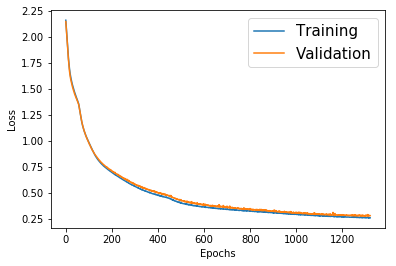

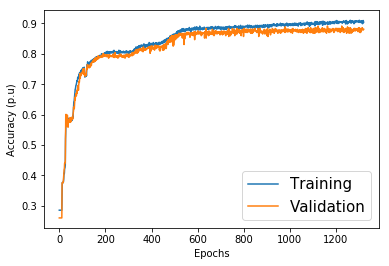

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam.fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (p.u)')
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
plt.savefig('accuracy with adam.fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [51]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(29, input_shape=(dims,)))
m.add(Activation('softmax'))
m.add(Dense(20))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=1500, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1131 samples, validate on 378 samples
Epoch 1/1500
1131/1131 [==============================] - 2s 1ms/step - loss: 2.1793 - acc: 0.2847 - val_loss: 2.1631 - val_acc: 0.2593
Epoch 2/1500
1131/1131 [==============================] - 0s 106us/step - loss: 2.1420 - acc: 0.2847 - val_loss: 2.1282 - val_acc: 0.2593
Epoch 3/1500
1131/1131 [==============================] - 0s 103us/step - loss: 2.1029 - acc: 0.2847 - val_loss: 2.0928 - val_acc: 0.2593
Epoch 4/1500
1131/1131 [==============================] - 0s 106us/step - loss: 2.0653 - acc: 0.2847 - val_loss: 2.0622 - val_acc: 0.2593
Epoch 5/1500
1131/1131 [==============================] - 0s 107us/step - loss: 2.0341 - acc: 0.2847 - val_loss: 2.0400 - val_acc: 0.2593
Epoch 6/1500
1131/1131 [==============================] - 0s 102us/step - loss: 2.0138 - acc: 0.2847 - val_loss: 2.0278 - val_acc: 0.2593
Epoch 7/1500
1131/1131 [==============================] - 0s 104us/step - loss: 2.0020 - acc: 0.2847 - val_loss: 2.0214 - val_a

Epoch 60/1500
1131/1131 [==============================] - 0s 99us/step - loss: 1.1461 - acc: 0.6163 - val_loss: 1.1587 - val_acc: 0.6323
Epoch 61/1500
1131/1131 [==============================] - 0s 93us/step - loss: 1.1370 - acc: 0.6225 - val_loss: 1.1515 - val_acc: 0.6402
Epoch 62/1500
1131/1131 [==============================] - 0s 89us/step - loss: 1.1278 - acc: 0.6242 - val_loss: 1.1416 - val_acc: 0.6376
Epoch 63/1500
1131/1131 [==============================] - 0s 103us/step - loss: 1.1189 - acc: 0.6251 - val_loss: 1.1334 - val_acc: 0.6402
Epoch 64/1500
1131/1131 [==============================] - 0s 103us/step - loss: 1.1103 - acc: 0.6313 - val_loss: 1.1238 - val_acc: 0.6429
Epoch 65/1500
1131/1131 [==============================] - 0s 95us/step - loss: 1.1006 - acc: 0.6322 - val_loss: 1.1171 - val_acc: 0.6429
Epoch 66/1500
1131/1131 [==============================] - 0s 92us/step - loss: 1.0918 - acc: 0.6340 - val_loss: 1.1072 - val_acc: 0.6534
Epoch 67/1500
1131/1131 [=======

Epoch 119/1500
1131/1131 [==============================] - 0s 117us/step - loss: 0.7909 - acc: 0.7701 - val_loss: 0.7928 - val_acc: 0.7725
Epoch 120/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.7886 - acc: 0.7692 - val_loss: 0.7888 - val_acc: 0.7698
Epoch 121/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.7851 - acc: 0.7719 - val_loss: 0.7861 - val_acc: 0.7698
Epoch 122/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.7823 - acc: 0.7710 - val_loss: 0.7839 - val_acc: 0.7725
Epoch 123/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.7793 - acc: 0.7745 - val_loss: 0.7805 - val_acc: 0.7698
Epoch 124/1500
1131/1131 [==============================] - 0s 104us/step - loss: 0.7770 - acc: 0.7763 - val_loss: 0.7784 - val_acc: 0.7751
Epoch 125/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.7747 - acc: 0.7781 - val_loss: 0.7764 - val_acc: 0.7725
Epoch 126/1500
1131/1131 

Epoch 178/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.6629 - acc: 0.8081 - val_loss: 0.6601 - val_acc: 0.7884
Epoch 179/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.6608 - acc: 0.8090 - val_loss: 0.6575 - val_acc: 0.7831
Epoch 180/1500
1131/1131 [==============================] - 0s 92us/step - loss: 0.6593 - acc: 0.8081 - val_loss: 0.6561 - val_acc: 0.7804
Epoch 181/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.6584 - acc: 0.8046 - val_loss: 0.6533 - val_acc: 0.7884
Epoch 182/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.6549 - acc: 0.8108 - val_loss: 0.6524 - val_acc: 0.7831
Epoch 183/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.6543 - acc: 0.8134 - val_loss: 0.6513 - val_acc: 0.7910
Epoch 184/1500
1131/1131 [==============================] - 0s 87us/step - loss: 0.6524 - acc: 0.8099 - val_loss: 0.6496 - val_acc: 0.7884
Epoch 185/1500
1131/1131 [=

Epoch 237/1500
1131/1131 [==============================] - 0s 106us/step - loss: 0.5712 - acc: 0.8267 - val_loss: 0.5679 - val_acc: 0.8069
Epoch 238/1500
1131/1131 [==============================] - 0s 92us/step - loss: 0.5700 - acc: 0.8232 - val_loss: 0.5660 - val_acc: 0.8069
Epoch 239/1500
1131/1131 [==============================] - 0s 94us/step - loss: 0.5694 - acc: 0.8267 - val_loss: 0.5655 - val_acc: 0.8095
Epoch 240/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.5668 - acc: 0.8285 - val_loss: 0.5639 - val_acc: 0.8069
Epoch 241/1500
1131/1131 [==============================] - 0s 94us/step - loss: 0.5649 - acc: 0.8258 - val_loss: 0.5615 - val_acc: 0.8095
Epoch 242/1500
1131/1131 [==============================] - 0s 92us/step - loss: 0.5635 - acc: 0.8249 - val_loss: 0.5593 - val_acc: 0.8095
Epoch 243/1500
1131/1131 [==============================] - 0s 97us/step - loss: 0.5619 - acc: 0.8285 - val_loss: 0.5585 - val_acc: 0.8122
Epoch 244/1500
1131/1131 [

Epoch 296/1500
1131/1131 [==============================] - 0s 103us/step - loss: 0.4879 - acc: 0.8355 - val_loss: 0.4860 - val_acc: 0.8201
Epoch 297/1500
1131/1131 [==============================] - 0s 98us/step - loss: 0.4864 - acc: 0.8400 - val_loss: 0.4861 - val_acc: 0.8201
Epoch 298/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.4850 - acc: 0.8382 - val_loss: 0.4833 - val_acc: 0.8228
Epoch 299/1500
1131/1131 [==============================] - 0s 89us/step - loss: 0.4839 - acc: 0.8355 - val_loss: 0.4823 - val_acc: 0.8201
Epoch 300/1500
1131/1131 [==============================] - 0s 110us/step - loss: 0.4836 - acc: 0.8373 - val_loss: 0.4819 - val_acc: 0.8228
Epoch 301/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.4805 - acc: 0.8426 - val_loss: 0.4804 - val_acc: 0.8175
Epoch 302/1500
1131/1131 [==============================] - 0s 102us/step - loss: 0.4792 - acc: 0.8408 - val_loss: 0.4774 - val_acc: 0.8201
Epoch 303/1500
1131/1131

Epoch 355/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.3750 - acc: 0.8727 - val_loss: 0.3840 - val_acc: 0.8704
Epoch 356/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.3740 - acc: 0.8771 - val_loss: 0.3827 - val_acc: 0.8704
Epoch 357/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.3729 - acc: 0.8806 - val_loss: 0.3818 - val_acc: 0.8730
Epoch 358/1500
1131/1131 [==============================] - 0s 97us/step - loss: 0.3710 - acc: 0.8771 - val_loss: 0.3796 - val_acc: 0.8704
Epoch 359/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.3700 - acc: 0.8789 - val_loss: 0.3788 - val_acc: 0.8677
Epoch 360/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.3680 - acc: 0.8815 - val_loss: 0.3777 - val_acc: 0.8677
Epoch 361/1500
1131/1131 [==============================] - 0s 104us/step - loss: 0.3678 - acc: 0.8798 - val_loss: 0.3757 - val_acc: 0.8730
Epoch 362/1500
1131/1131 [

Epoch 414/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.3053 - acc: 0.8921 - val_loss: 0.3210 - val_acc: 0.8783
Epoch 415/1500
1131/1131 [==============================] - 0s 106us/step - loss: 0.3055 - acc: 0.8957 - val_loss: 0.3198 - val_acc: 0.8810
Epoch 416/1500
1131/1131 [==============================] - 0s 92us/step - loss: 0.3045 - acc: 0.8930 - val_loss: 0.3189 - val_acc: 0.8783
Epoch 417/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.3039 - acc: 0.8930 - val_loss: 0.3179 - val_acc: 0.8810
Epoch 418/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.3031 - acc: 0.8992 - val_loss: 0.3179 - val_acc: 0.8783
Epoch 419/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.3027 - acc: 0.8966 - val_loss: 0.3174 - val_acc: 0.8836
Epoch 420/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.3016 - acc: 0.9010 - val_loss: 0.3160 - val_acc: 0.8810
Epoch 421/1500
1131/1131 [

1131/1131 [==============================] - 0s 106us/step - loss: 0.2696 - acc: 0.9107 - val_loss: 0.2858 - val_acc: 0.8995
Epoch 473/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.2683 - acc: 0.9134 - val_loss: 0.2854 - val_acc: 0.8995
Epoch 474/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.2680 - acc: 0.9142 - val_loss: 0.2834 - val_acc: 0.8968
Epoch 475/1500
1131/1131 [==============================] - 0s 97us/step - loss: 0.2681 - acc: 0.9089 - val_loss: 0.2829 - val_acc: 0.8968
Epoch 476/1500
1131/1131 [==============================] - 0s 89us/step - loss: 0.2669 - acc: 0.9098 - val_loss: 0.2833 - val_acc: 0.8968
Epoch 477/1500
1131/1131 [==============================] - 0s 103us/step - loss: 0.2661 - acc: 0.9089 - val_loss: 0.2830 - val_acc: 0.8995
Epoch 478/1500
1131/1131 [==============================] - 0s 102us/step - loss: 0.2661 - acc: 0.9134 - val_loss: 0.2825 - val_acc: 0.8995
Epoch 479/1500
1131/1131 [=============

Epoch 531/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.2455 - acc: 0.9178 - val_loss: 0.2623 - val_acc: 0.9021
Epoch 532/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.2468 - acc: 0.9178 - val_loss: 0.2630 - val_acc: 0.8968
Epoch 533/1500
1131/1131 [==============================] - 0s 103us/step - loss: 0.2445 - acc: 0.9178 - val_loss: 0.2620 - val_acc: 0.9021
Epoch 534/1500
1131/1131 [==============================] - 0s 103us/step - loss: 0.2445 - acc: 0.9204 - val_loss: 0.2607 - val_acc: 0.9021
Epoch 535/1500
1131/1131 [==============================] - 0s 98us/step - loss: 0.2442 - acc: 0.9195 - val_loss: 0.2609 - val_acc: 0.8995
Epoch 536/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.2438 - acc: 0.9213 - val_loss: 0.2601 - val_acc: 0.9048
Epoch 537/1500
1131/1131 [==============================] - 0s 103us/step - loss: 0.2434 - acc: 0.9178 - val_loss: 0.2612 - val_acc: 0.8995
Epoch 538/1500
1131/1131

1131/1131 [==============================] - 0s 134us/step - loss: 0.2300 - acc: 0.9195 - val_loss: 0.2473 - val_acc: 0.9021
Epoch 590/1500
1131/1131 [==============================] - 0s 110us/step - loss: 0.2308 - acc: 0.9195 - val_loss: 0.2471 - val_acc: 0.9048
Epoch 591/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.2290 - acc: 0.9187 - val_loss: 0.2472 - val_acc: 0.8995
Epoch 592/1500
1131/1131 [==============================] - 0s 83us/step - loss: 0.2291 - acc: 0.9213 - val_loss: 0.2476 - val_acc: 0.8995
Epoch 593/1500
1131/1131 [==============================] - 0s 69us/step - loss: 0.2300 - acc: 0.9178 - val_loss: 0.2468 - val_acc: 0.9074
Epoch 594/1500
1131/1131 [==============================] - 0s 71us/step - loss: 0.2277 - acc: 0.9187 - val_loss: 0.2460 - val_acc: 0.9048
Epoch 595/1500
1131/1131 [==============================] - 0s 88us/step - loss: 0.2288 - acc: 0.9178 - val_loss: 0.2453 - val_acc: 0.9048
Epoch 596/1500
1131/1131 [==============

1131/1131 [==============================] - 0s 106us/step - loss: 0.2180 - acc: 0.9195 - val_loss: 0.2381 - val_acc: 0.9101
Epoch 648/1500
1131/1131 [==============================] - 0s 166us/step - loss: 0.2201 - acc: 0.9178 - val_loss: 0.2415 - val_acc: 0.9074
Epoch 649/1500
1131/1131 [==============================] - 0s 159us/step - loss: 0.2181 - acc: 0.9266 - val_loss: 0.2373 - val_acc: 0.9101
Epoch 650/1500
1131/1131 [==============================] - 0s 152us/step - loss: 0.2179 - acc: 0.9187 - val_loss: 0.2377 - val_acc: 0.9074
Epoch 651/1500
1131/1131 [==============================] - 0s 156us/step - loss: 0.2196 - acc: 0.9204 - val_loss: 0.2379 - val_acc: 0.9074
Epoch 652/1500
1131/1131 [==============================] - 0s 124us/step - loss: 0.2168 - acc: 0.9195 - val_loss: 0.2393 - val_acc: 0.9048
Epoch 653/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.2163 - acc: 0.9213 - val_loss: 0.2372 - val_acc: 0.9101
Epoch 654/1500
1131/1131 [==========

1131/1131 [==============================] - 0s 110us/step - loss: 0.2102 - acc: 0.9213 - val_loss: 0.2318 - val_acc: 0.9127
Epoch 706/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.2093 - acc: 0.9213 - val_loss: 0.2305 - val_acc: 0.9153
Epoch 707/1500
1131/1131 [==============================] - 0s 91us/step - loss: 0.2084 - acc: 0.9222 - val_loss: 0.2322 - val_acc: 0.9074
Epoch 708/1500
1131/1131 [==============================] - 0s 112us/step - loss: 0.2096 - acc: 0.9231 - val_loss: 0.2326 - val_acc: 0.9048
Epoch 709/1500
1131/1131 [==============================] - 0s 94us/step - loss: 0.2084 - acc: 0.9248 - val_loss: 0.2301 - val_acc: 0.9153
Epoch 710/1500
1131/1131 [==============================] - 0s 102us/step - loss: 0.2087 - acc: 0.9222 - val_loss: 0.2316 - val_acc: 0.9074
Epoch 711/1500
1131/1131 [==============================] - 0s 102us/step - loss: 0.2088 - acc: 0.9240 - val_loss: 0.2312 - val_acc: 0.9074
Epoch 712/1500
1131/1131 [============

Epoch 764/1500
1131/1131 [==============================] - 0s 152us/step - loss: 0.2034 - acc: 0.9213 - val_loss: 0.2298 - val_acc: 0.8995
Epoch 765/1500
1131/1131 [==============================] - 0s 180us/step - loss: 0.2020 - acc: 0.9275 - val_loss: 0.2260 - val_acc: 0.9153
Epoch 766/1500
1131/1131 [==============================] - 0s 159us/step - loss: 0.2031 - acc: 0.9204 - val_loss: 0.2265 - val_acc: 0.9101
Epoch 767/1500
1131/1131 [==============================] - 0s 194us/step - loss: 0.2035 - acc: 0.9222 - val_loss: 0.2257 - val_acc: 0.9127
Epoch 768/1500
1131/1131 [==============================] - 0s 163us/step - loss: 0.2043 - acc: 0.9248 - val_loss: 0.2254 - val_acc: 0.9180
Epoch 769/1500
1131/1131 [==============================] - 0s 156us/step - loss: 0.2013 - acc: 0.9231 - val_loss: 0.2253 - val_acc: 0.9180
Epoch 770/1500
1131/1131 [==============================] - 0s 166us/step - loss: 0.2016 - acc: 0.9257 - val_loss: 0.2270 - val_acc: 0.9101
Epoch 771/1500
1131/

1131/1131 [==============================] - 0s 103us/step - loss: 0.1969 - acc: 0.9257 - val_loss: 0.2224 - val_acc: 0.9127
Epoch 823/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.1966 - acc: 0.9231 - val_loss: 0.2226 - val_acc: 0.9153
Epoch 824/1500
1131/1131 [==============================] - 0s 93us/step - loss: 0.1968 - acc: 0.9213 - val_loss: 0.2215 - val_acc: 0.9127
Epoch 825/1500
1131/1131 [==============================] - 0s 89us/step - loss: 0.1967 - acc: 0.9248 - val_loss: 0.2216 - val_acc: 0.9153
Epoch 826/1500
1131/1131 [==============================] - 0s 105us/step - loss: 0.1957 - acc: 0.9257 - val_loss: 0.2229 - val_acc: 0.9127
Epoch 827/1500
1131/1131 [==============================] - 0s 100us/step - loss: 0.1956 - acc: 0.9213 - val_loss: 0.2213 - val_acc: 0.9153
Epoch 828/1500
1131/1131 [==============================] - 0s 89us/step - loss: 0.1959 - acc: 0.9222 - val_loss: 0.2210 - val_acc: 0.9127
Epoch 829/1500
1131/1131 [=============

Epoch 881/1500
1131/1131 [==============================] - 0s 99us/step - loss: 0.1915 - acc: 0.9275 - val_loss: 0.2178 - val_acc: 0.9153
Epoch 882/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.1911 - acc: 0.9231 - val_loss: 0.2195 - val_acc: 0.9180
Epoch 883/1500
1131/1131 [==============================] - 0s 95us/step - loss: 0.1935 - acc: 0.9310 - val_loss: 0.2167 - val_acc: 0.9180
Epoch 884/1500
1131/1131 [==============================] - 0s 92us/step - loss: 0.1929 - acc: 0.9240 - val_loss: 0.2184 - val_acc: 0.9153
Epoch 885/1500
1131/1131 [==============================] - 0s 100us/step - loss: 0.1916 - acc: 0.9302 - val_loss: 0.2171 - val_acc: 0.9153
Epoch 886/1500
1131/1131 [==============================] - 0s 96us/step - loss: 0.1913 - acc: 0.9240 - val_loss: 0.2188 - val_acc: 0.9153
Epoch 887/1500
1131/1131 [==============================] - 0s 92us/step - loss: 0.1916 - acc: 0.9257 - val_loss: 0.2186 - val_acc: 0.9153
Epoch 888/1500
1131/1131 [

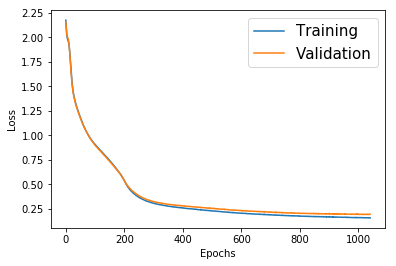

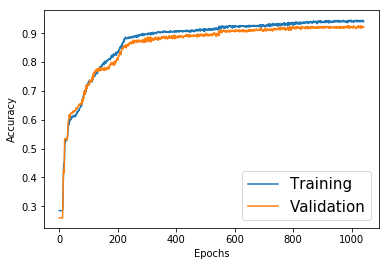

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.savefig('loss with adam(hist).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], prop={'size': 15})

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.savefig('accuracy with adam(hist).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [28]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 1s 784us/step - loss: 1.9906 - acc: 0.2847 - val_loss: 1.9098 - val_acc: 0.2593
Epoch 2/3000
1131/1131 [==============================] - 0s 84us/step - loss: 1.8527 - acc: 0.2847 - val_loss: 1.8061 - val_acc: 0.2646
Epoch 3/3000
1131/1131 [==============================] - 0s 71us/step - loss: 1.7521 - acc: 0.4076 - val_loss: 1.6980 - val_acc: 0.4233
Epoch 4/3000
1131/1131 [==============================] - 0s 71us/step - loss: 1.6482 - acc: 0.5102 - val_loss: 1.5912 - val_acc: 0.5265
Epoch 5/3000
1131/1131 [==============================] - 0s 74us/step - loss: 1.5319 - acc: 0.5349 - val_loss: 1.4711 - val_acc: 0.5397
Epoch 6/3000
1131/1131 [==============================] - 0s 71us/step - loss: 1.4158 - acc: 0.5367 - val_loss: 1.3868 - val_acc: 0.5450
Epoch 7/3000
1131/1131 [==============================] - 0s 71us/step - loss: 1.3200 - acc: 0.5402 - val_loss: 1.2708 - val_acc: 

Epoch 60/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3093 - acc: 0.9001 - val_loss: 0.3537 - val_acc: 0.8810
Epoch 61/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3192 - acc: 0.8930 - val_loss: 0.3184 - val_acc: 0.8757
Epoch 62/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3103 - acc: 0.9010 - val_loss: 0.3616 - val_acc: 0.8730
Epoch 63/3000
1131/1131 [==============================] - 0s 53us/step - loss: 0.3159 - acc: 0.8912 - val_loss: 0.3261 - val_acc: 0.8783
Epoch 64/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3045 - acc: 0.8966 - val_loss: 0.3298 - val_acc: 0.8704
Epoch 65/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.3094 - acc: 0.8895 - val_loss: 0.3199 - val_acc: 0.8730
Epoch 66/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.3013 - acc: 0.8930 - val_loss: 0.2982 - val_acc: 0.8889
Epoch 67/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 67us/step - loss: 0.2306 - acc: 0.9116 - val_loss: 0.2392 - val_acc: 0.9101
Epoch 120/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2328 - acc: 0.9107 - val_loss: 0.2632 - val_acc: 0.9021
Epoch 121/3000
1131/1131 [==============================] - 0s 66us/step - loss: 0.2419 - acc: 0.9187 - val_loss: 0.2334 - val_acc: 0.9127
Epoch 122/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.2234 - acc: 0.9080 - val_loss: 0.3101 - val_acc: 0.8624
Epoch 123/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.2358 - acc: 0.9063 - val_loss: 0.2770 - val_acc: 0.8704
Epoch 124/3000
1131/1131 [==============================] - 0s 64us/step - loss: 0.2302 - acc: 0.9134 - val_loss: 0.2874 - val_acc: 0.8730
Epoch 125/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.2263 - acc: 0.9195 - val_loss: 0.2488 - val_acc: 0.8810
Epoch 126/3000
1131/1131 [================

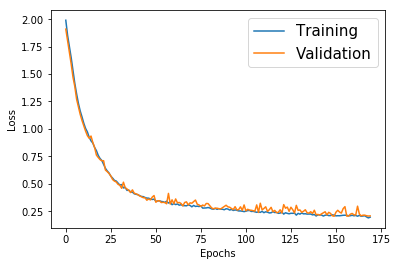

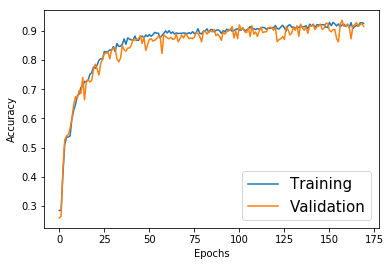

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist2).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist2)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.savefig('accuracy with adam(hist2).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist2)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [29]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist11=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])


Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 1s 811us/step - loss: 2.1653 - acc: 0.1256 - val_loss: 2.1181 - val_acc: 0.2090
Epoch 2/3000
1131/1131 [==============================] - 0s 93us/step - loss: 2.0577 - acc: 0.1989 - val_loss: 1.9929 - val_acc: 0.2011
Epoch 3/3000
1131/1131 [==============================] - 0s 78us/step - loss: 1.9206 - acc: 0.2370 - val_loss: 1.8651 - val_acc: 0.3254
Epoch 4/3000
1131/1131 [==============================] - 0s 82us/step - loss: 1.8023 - acc: 0.4129 - val_loss: 1.7565 - val_acc: 0.4656
Epoch 5/3000
1131/1131 [==============================] - 0s 83us/step - loss: 1.6853 - acc: 0.5102 - val_loss: 1.6312 - val_acc: 0.5265
Epoch 6/3000
1131/1131 [==============================] - 0s 82us/step - loss: 1.5627 - acc: 0.5323 - val_loss: 1.5024 - val_acc: 0.5344
Epoch 7/3000
1131/1131 [==============================] - 0s 81us/step - loss: 1.4437 - acc: 0.5438 - val_loss: 1.3899 - val_acc: 

1131/1131 [==============================] - 0s 78us/step - loss: 0.3735 - acc: 0.8930 - val_loss: 0.3750 - val_acc: 0.8757
Epoch 61/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3661 - acc: 0.8904 - val_loss: 0.3606 - val_acc: 0.8836
Epoch 62/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3621 - acc: 0.8912 - val_loss: 0.3612 - val_acc: 0.8810
Epoch 63/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3569 - acc: 0.8912 - val_loss: 0.3489 - val_acc: 0.8889
Epoch 64/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3530 - acc: 0.8939 - val_loss: 0.3466 - val_acc: 0.8889
Epoch 65/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3493 - acc: 0.8859 - val_loss: 0.3439 - val_acc: 0.8942
Epoch 66/3000
1131/1131 [==============================] - 0s 77us/step - loss: 0.3432 - acc: 0.8992 - val_loss: 0.3396 - val_acc: 0.8942
Epoch 67/3000
1131/1131 [=======================

1131/1131 [==============================] - 0s 74us/step - loss: 0.2472 - acc: 0.9169 - val_loss: 0.2457 - val_acc: 0.9180
Epoch 120/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2452 - acc: 0.9169 - val_loss: 0.2440 - val_acc: 0.9180
Epoch 121/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2463 - acc: 0.9151 - val_loss: 0.2503 - val_acc: 0.9180
Epoch 122/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2410 - acc: 0.9195 - val_loss: 0.2389 - val_acc: 0.9127
Epoch 123/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2416 - acc: 0.9195 - val_loss: 0.2497 - val_acc: 0.9127
Epoch 124/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2419 - acc: 0.9187 - val_loss: 0.2405 - val_acc: 0.9153
Epoch 125/3000
1131/1131 [==============================] - 0s 76us/step - loss: 0.2374 - acc: 0.9151 - val_loss: 0.2445 - val_acc: 0.9101
Epoch 126/3000
1131/1131 [================

1131/1131 [==============================] - 0s 74us/step - loss: 0.2069 - acc: 0.9257 - val_loss: 0.2104 - val_acc: 0.9180
Epoch 179/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2060 - acc: 0.9266 - val_loss: 0.2128 - val_acc: 0.9233
Epoch 180/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2062 - acc: 0.9266 - val_loss: 0.2122 - val_acc: 0.9286
Epoch 181/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2066 - acc: 0.9266 - val_loss: 0.2092 - val_acc: 0.9233
Epoch 182/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2062 - acc: 0.9240 - val_loss: 0.2095 - val_acc: 0.9233
Epoch 183/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2030 - acc: 0.9257 - val_loss: 0.2136 - val_acc: 0.9259
Epoch 184/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1998 - acc: 0.9293 - val_loss: 0.2141 - val_acc: 0.9206
Epoch 185/3000
1131/1131 [================

1131/1131 [==============================] - 0s 74us/step - loss: 0.1865 - acc: 0.9310 - val_loss: 0.1949 - val_acc: 0.9233
Epoch 238/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1834 - acc: 0.9302 - val_loss: 0.1992 - val_acc: 0.9259
Epoch 239/3000
1131/1131 [==============================] - 0s 73us/step - loss: 0.1818 - acc: 0.9302 - val_loss: 0.1994 - val_acc: 0.9233
Epoch 240/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1818 - acc: 0.9310 - val_loss: 0.1961 - val_acc: 0.9233
Epoch 241/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1824 - acc: 0.9293 - val_loss: 0.1983 - val_acc: 0.9233
Epoch 242/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1809 - acc: 0.9337 - val_loss: 0.1971 - val_acc: 0.9259
Epoch 243/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1812 - acc: 0.9337 - val_loss: 0.1974 - val_acc: 0.9286
Epoch 244/3000
1131/1131 [================

1131/1131 [==============================] - 0s 74us/step - loss: 0.1677 - acc: 0.9372 - val_loss: 0.1941 - val_acc: 0.9153
Epoch 297/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1698 - acc: 0.9363 - val_loss: 0.1893 - val_acc: 0.9153
Epoch 298/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.1691 - acc: 0.9328 - val_loss: 0.1904 - val_acc: 0.9233
Epoch 299/3000
1131/1131 [==============================] - 0s 77us/step - loss: 0.1739 - acc: 0.9337 - val_loss: 0.1927 - val_acc: 0.9259
Epoch 300/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1685 - acc: 0.9363 - val_loss: 0.1923 - val_acc: 0.9127
Epoch 301/3000
1131/1131 [==============================] - 0s 75us/step - loss: 0.1692 - acc: 0.9408 - val_loss: 0.2049 - val_acc: 0.9233
Epoch 302/3000
1131/1131 [==============================] - 0s 77us/step - loss: 0.1737 - acc: 0.9390 - val_loss: 0.1915 - val_acc: 0.9286
Epoch 303/3000
1131/1131 [================

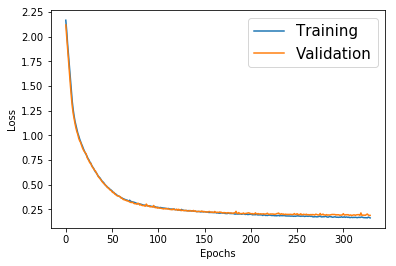

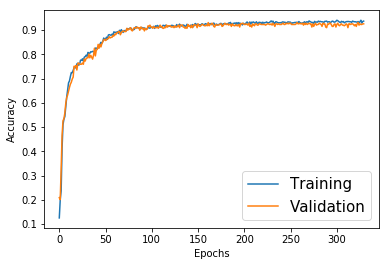

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist11.history['loss'])
plt.plot(hist11.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist11).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist11)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist11.history['acc'])
plt.plot(hist11.history['val_acc'])
plt.savefig('accuracy with adam(hist11).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist11)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [34]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=rmsp,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 1s 849us/step - loss: 2.0875 - acc: 0.2255 - val_loss: 2.0054 - val_acc: 0.2619
Epoch 2/3000
1131/1131 [==============================] - 0s 88us/step - loss: 1.9449 - acc: 0.2865 - val_loss: 1.8993 - val_acc: 0.2619
Epoch 3/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.8569 - acc: 0.3201 - val_loss: 1.8256 - val_acc: 0.3942
Epoch 4/3000
1131/1131 [==============================] - 0s 88us/step - loss: 1.7809 - acc: 0.3864 - val_loss: 1.7532 - val_acc: 0.4101
Epoch 5/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.7019 - acc: 0.4279 - val_loss: 1.6672 - val_acc: 0.4339
Epoch 6/3000
1131/1131 [==============================] - 0s 88us/step - loss: 1.6148 - acc: 0.5004 - val_loss: 1.5760 - val_acc: 0.5106
Epoch 7/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.5266 - acc: 0.5323 - val_loss: 1.4812 - val_acc: 

1131/1131 [==============================] - 0s 81us/step - loss: 0.4076 - acc: 0.8674 - val_loss: 0.4098 - val_acc: 0.8677
Epoch 61/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.4068 - acc: 0.8576 - val_loss: 0.3894 - val_acc: 0.8757
Epoch 62/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3947 - acc: 0.8647 - val_loss: 0.3918 - val_acc: 0.8836
Epoch 63/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3898 - acc: 0.8709 - val_loss: 0.3852 - val_acc: 0.8889
Epoch 64/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3837 - acc: 0.8762 - val_loss: 0.3785 - val_acc: 0.8889
Epoch 65/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3741 - acc: 0.8824 - val_loss: 0.3813 - val_acc: 0.8915
Epoch 66/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3726 - acc: 0.8736 - val_loss: 0.3603 - val_acc: 0.8730
Epoch 67/3000
1131/1131 [=======================

1131/1131 [==============================] - 0s 103us/step - loss: 0.2322 - acc: 0.9142 - val_loss: 0.2469 - val_acc: 0.9048
Epoch 120/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.2302 - acc: 0.9169 - val_loss: 0.2454 - val_acc: 0.9074
Epoch 121/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.2280 - acc: 0.9195 - val_loss: 0.2505 - val_acc: 0.9101
Epoch 122/3000
1131/1131 [==============================] - 0s 120us/step - loss: 0.2279 - acc: 0.9195 - val_loss: 0.2433 - val_acc: 0.9021
Epoch 123/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.2257 - acc: 0.9266 - val_loss: 0.2379 - val_acc: 0.9127
Epoch 124/3000
1131/1131 [==============================] - 0s 120us/step - loss: 0.2266 - acc: 0.9187 - val_loss: 0.2490 - val_acc: 0.9074
Epoch 125/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.2248 - acc: 0.9231 - val_loss: 0.2481 - val_acc: 0.9153
Epoch 126/3000
1131/1131 [=========

Epoch 178/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.1884 - acc: 0.9266 - val_loss: 0.2204 - val_acc: 0.9153
Epoch 179/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1894 - acc: 0.9275 - val_loss: 0.2126 - val_acc: 0.9153
Epoch 180/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1868 - acc: 0.9302 - val_loss: 0.2165 - val_acc: 0.9153
Epoch 181/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1867 - acc: 0.9319 - val_loss: 0.2264 - val_acc: 0.9180
Epoch 182/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1894 - acc: 0.9275 - val_loss: 0.2113 - val_acc: 0.9180
Epoch 183/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1875 - acc: 0.9293 - val_loss: 0.2199 - val_acc: 0.9206
Epoch 184/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1864 - acc: 0.9337 - val_loss: 0.2107 - val_acc: 0.9206
Epoch 185/3000
1131/1131 [=

Epoch 237/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1704 - acc: 0.9372 - val_loss: 0.2059 - val_acc: 0.9127
Epoch 238/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1695 - acc: 0.9355 - val_loss: 0.2084 - val_acc: 0.9180
Epoch 239/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1714 - acc: 0.9355 - val_loss: 0.2041 - val_acc: 0.9153
Epoch 240/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1688 - acc: 0.9355 - val_loss: 0.2387 - val_acc: 0.9101
Epoch 241/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1700 - acc: 0.9363 - val_loss: 0.2032 - val_acc: 0.9206
Epoch 242/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1692 - acc: 0.9355 - val_loss: 0.2072 - val_acc: 0.9259
Epoch 243/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1677 - acc: 0.9355 - val_loss: 0.2036 - val_acc: 0.9206
Epoch 244/3000
1131/1131 [=

1131/1131 [==============================] - 0s 88us/step - loss: 0.1586 - acc: 0.9452 - val_loss: 0.2049 - val_acc: 0.9180
Epoch 296/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.1556 - acc: 0.9381 - val_loss: 0.2198 - val_acc: 0.9153
Epoch 297/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1586 - acc: 0.9337 - val_loss: 0.2013 - val_acc: 0.9206
Epoch 298/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1554 - acc: 0.9372 - val_loss: 0.1987 - val_acc: 0.9206
Epoch 299/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1559 - acc: 0.9390 - val_loss: 0.2046 - val_acc: 0.9127
Epoch 300/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1548 - acc: 0.9408 - val_loss: 0.1999 - val_acc: 0.9206
Epoch 301/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1578 - acc: 0.9363 - val_loss: 0.1959 - val_acc: 0.9153
Epoch 302/3000
1131/1131 [================

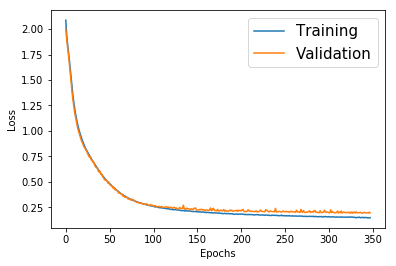

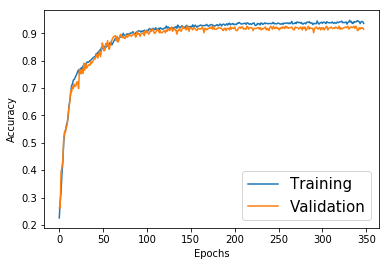

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist3).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist3)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist3.history['acc'])
plt.plot(hist3.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist3).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist3)', format='eps', dpi=1000)

In [36]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist4=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 1s 754us/step - loss: 1.9522 - acc: 0.2989 - val_loss: 1.8172 - val_acc: 0.2646
Epoch 2/3000
1131/1131 [==============================] - 0s 90us/step - loss: 1.7296 - acc: 0.4005 - val_loss: 1.6728 - val_acc: 0.4101
Epoch 3/3000
1131/1131 [==============================] - 0s 84us/step - loss: 1.6038 - acc: 0.4439 - val_loss: 1.5635 - val_acc: 0.4127
Epoch 4/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.5084 - acc: 0.4907 - val_loss: 1.4813 - val_acc: 0.5291
Epoch 5/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.4325 - acc: 0.5376 - val_loss: 1.4094 - val_acc: 0.5397
Epoch 6/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.3697 - acc: 0.5455 - val_loss: 1.3532 - val_acc: 0.5529
Epoch 7/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.3167 - acc: 0.5553 - val_loss: 1.3073 - val_acc: 

1131/1131 [==============================] - 0s 110us/step - loss: 0.6968 - acc: 0.7798 - val_loss: 0.6960 - val_acc: 0.7804
Epoch 61/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.6920 - acc: 0.7843 - val_loss: 0.6943 - val_acc: 0.7884
Epoch 62/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.6873 - acc: 0.7816 - val_loss: 0.6891 - val_acc: 0.7804
Epoch 63/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.6827 - acc: 0.7860 - val_loss: 0.6840 - val_acc: 0.7804
Epoch 64/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.6787 - acc: 0.7843 - val_loss: 0.6791 - val_acc: 0.7910
Epoch 65/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.6736 - acc: 0.7878 - val_loss: 0.6771 - val_acc: 0.7884
Epoch 66/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.6703 - acc: 0.7922 - val_loss: 0.6716 - val_acc: 0.7910
Epoch 67/3000
1131/1131 [======================

1131/1131 [==============================] - 0s 81us/step - loss: 0.5176 - acc: 0.8470 - val_loss: 0.5193 - val_acc: 0.8307
Epoch 120/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.5159 - acc: 0.8426 - val_loss: 0.5159 - val_acc: 0.8360
Epoch 121/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.5140 - acc: 0.8515 - val_loss: 0.5137 - val_acc: 0.8307
Epoch 122/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.5116 - acc: 0.8488 - val_loss: 0.5120 - val_acc: 0.8280
Epoch 123/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.5103 - acc: 0.8515 - val_loss: 0.5083 - val_acc: 0.8254
Epoch 124/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.5079 - acc: 0.8541 - val_loss: 0.5069 - val_acc: 0.8280
Epoch 125/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.5067 - acc: 0.8541 - val_loss: 0.5064 - val_acc: 0.8386
Epoch 126/3000
1131/1131 [================

1131/1131 [==============================] - 0s 99us/step - loss: 0.4330 - acc: 0.8824 - val_loss: 0.4302 - val_acc: 0.8651
Epoch 179/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.4322 - acc: 0.8798 - val_loss: 0.4294 - val_acc: 0.8598
Epoch 180/3000
1131/1131 [==============================] - 0s 113us/step - loss: 0.4310 - acc: 0.8824 - val_loss: 0.4282 - val_acc: 0.8624
Epoch 181/3000
1131/1131 [==============================] - 0s 110us/step - loss: 0.4298 - acc: 0.8824 - val_loss: 0.4271 - val_acc: 0.8651
Epoch 182/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.4287 - acc: 0.8824 - val_loss: 0.4258 - val_acc: 0.8598
Epoch 183/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.4277 - acc: 0.8824 - val_loss: 0.4255 - val_acc: 0.8624
Epoch 184/3000
1131/1131 [==============================] - 0s 99us/step - loss: 0.4268 - acc: 0.8833 - val_loss: 0.4247 - val_acc: 0.8651
Epoch 185/3000
1131/1131 [===========

Epoch 237/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3833 - acc: 0.8921 - val_loss: 0.3800 - val_acc: 0.8783
Epoch 238/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3825 - acc: 0.8912 - val_loss: 0.3793 - val_acc: 0.8757
Epoch 239/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3820 - acc: 0.8912 - val_loss: 0.3796 - val_acc: 0.8757
Epoch 240/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3812 - acc: 0.8921 - val_loss: 0.3791 - val_acc: 0.8757
Epoch 241/3000
1131/1131 [==============================] - 0s 99us/step - loss: 0.3807 - acc: 0.8939 - val_loss: 0.3777 - val_acc: 0.8783
Epoch 242/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.3798 - acc: 0.8939 - val_loss: 0.3765 - val_acc: 0.8783
Epoch 243/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.3795 - acc: 0.8921 - val_loss: 0.3760 - val_acc: 0.8757
Epoch 244/3000
1131/1131 

Epoch 296/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.3503 - acc: 0.8974 - val_loss: 0.3477 - val_acc: 0.8836
Epoch 297/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3498 - acc: 0.8974 - val_loss: 0.3473 - val_acc: 0.8810
Epoch 298/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3492 - acc: 0.8966 - val_loss: 0.3464 - val_acc: 0.8810
Epoch 299/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.3486 - acc: 0.8983 - val_loss: 0.3459 - val_acc: 0.8810
Epoch 300/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3483 - acc: 0.8966 - val_loss: 0.3459 - val_acc: 0.8836
Epoch 301/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3480 - acc: 0.8974 - val_loss: 0.3456 - val_acc: 0.8836
Epoch 302/3000
1131/1131 [==============================] - 0s 72us/step - loss: 0.3474 - acc: 0.8983 - val_loss: 0.3452 - val_acc: 0.8836
Epoch 303/3000
1131/1131 [=

Epoch 355/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3265 - acc: 0.9019 - val_loss: 0.3252 - val_acc: 0.8836
Epoch 356/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3259 - acc: 0.9019 - val_loss: 0.3247 - val_acc: 0.8836
Epoch 357/3000
1131/1131 [==============================] - 0s 72us/step - loss: 0.3256 - acc: 0.9027 - val_loss: 0.3247 - val_acc: 0.8836
Epoch 358/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3255 - acc: 0.9019 - val_loss: 0.3243 - val_acc: 0.8836
Epoch 359/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3251 - acc: 0.9027 - val_loss: 0.3246 - val_acc: 0.8836
Epoch 360/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3246 - acc: 0.9019 - val_loss: 0.3242 - val_acc: 0.8836
Epoch 361/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.3242 - acc: 0.9019 - val_loss: 0.3243 - val_acc: 0.8836
Epoch 362/3000
1131/1131 [=

Epoch 414/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.3084 - acc: 0.9036 - val_loss: 0.3100 - val_acc: 0.8836
Epoch 415/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.3081 - acc: 0.9045 - val_loss: 0.3090 - val_acc: 0.8836
Epoch 416/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.3080 - acc: 0.9036 - val_loss: 0.3081 - val_acc: 0.8810
Epoch 417/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3077 - acc: 0.9036 - val_loss: 0.3080 - val_acc: 0.8810
Epoch 418/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.3075 - acc: 0.9036 - val_loss: 0.3073 - val_acc: 0.8810
Epoch 419/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3070 - acc: 0.9027 - val_loss: 0.3080 - val_acc: 0.8810
Epoch 420/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.3068 - acc: 0.9045 - val_loss: 0.3072 - val_acc: 0.8810
Epoch 421/3000
1131/1131 [=

Epoch 473/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2944 - acc: 0.9036 - val_loss: 0.2966 - val_acc: 0.8862
Epoch 474/3000
1131/1131 [==============================] - 0s 70us/step - loss: 0.2940 - acc: 0.9045 - val_loss: 0.2963 - val_acc: 0.8862
Epoch 475/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2939 - acc: 0.9045 - val_loss: 0.2956 - val_acc: 0.8862
Epoch 476/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2937 - acc: 0.9054 - val_loss: 0.2951 - val_acc: 0.8836
Epoch 477/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2934 - acc: 0.9045 - val_loss: 0.2953 - val_acc: 0.8836
Epoch 478/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2931 - acc: 0.9036 - val_loss: 0.2954 - val_acc: 0.8862
Epoch 479/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2930 - acc: 0.9045 - val_loss: 0.2946 - val_acc: 0.8836
Epoch 480/3000
1131/1131 [=

Epoch 532/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2829 - acc: 0.9054 - val_loss: 0.2867 - val_acc: 0.8862
Epoch 533/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2825 - acc: 0.9072 - val_loss: 0.2868 - val_acc: 0.8862
Epoch 534/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2823 - acc: 0.9036 - val_loss: 0.2865 - val_acc: 0.8862
Epoch 535/3000
1131/1131 [==============================] - 0s 73us/step - loss: 0.2822 - acc: 0.9072 - val_loss: 0.2865 - val_acc: 0.8889
Epoch 536/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2820 - acc: 0.9054 - val_loss: 0.2865 - val_acc: 0.8862
Epoch 537/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2819 - acc: 0.9063 - val_loss: 0.2861 - val_acc: 0.8862
Epoch 538/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2816 - acc: 0.9036 - val_loss: 0.2862 - val_acc: 0.8862
Epoch 539/3000
1131/1131 [=

Epoch 591/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2733 - acc: 0.9089 - val_loss: 0.2789 - val_acc: 0.8862
Epoch 592/3000
1131/1131 [==============================] - 0s 73us/step - loss: 0.2730 - acc: 0.9080 - val_loss: 0.2784 - val_acc: 0.8862
Epoch 593/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2727 - acc: 0.9063 - val_loss: 0.2784 - val_acc: 0.8836
Epoch 594/3000
1131/1131 [==============================] - 0s 77us/step - loss: 0.2726 - acc: 0.9080 - val_loss: 0.2781 - val_acc: 0.8836
Epoch 595/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2725 - acc: 0.9072 - val_loss: 0.2780 - val_acc: 0.8836
Epoch 596/3000
1131/1131 [==============================] - 0s 75us/step - loss: 0.2723 - acc: 0.9036 - val_loss: 0.2781 - val_acc: 0.8862
Epoch 597/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2723 - acc: 0.9072 - val_loss: 0.2782 - val_acc: 0.8862
Epoch 598/3000
1131/1131 [=

Epoch 650/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2650 - acc: 0.9072 - val_loss: 0.2728 - val_acc: 0.8862
Epoch 651/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.2649 - acc: 0.9063 - val_loss: 0.2726 - val_acc: 0.8862
Epoch 652/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2648 - acc: 0.9080 - val_loss: 0.2725 - val_acc: 0.8862
Epoch 653/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.2645 - acc: 0.9063 - val_loss: 0.2720 - val_acc: 0.8862
Epoch 654/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2647 - acc: 0.9063 - val_loss: 0.2723 - val_acc: 0.8862
Epoch 655/3000
1131/1131 [==============================] - 0s 82us/step - loss: 0.2644 - acc: 0.9072 - val_loss: 0.2722 - val_acc: 0.8862
Epoch 656/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.2642 - acc: 0.9063 - val_loss: 0.2721 - val_acc: 0.8862
Epoch 657/3000
1131/1131 [=

Epoch 709/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2580 - acc: 0.9089 - val_loss: 0.2671 - val_acc: 0.8862
Epoch 710/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2580 - acc: 0.9080 - val_loss: 0.2671 - val_acc: 0.8862
Epoch 711/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2577 - acc: 0.9080 - val_loss: 0.2669 - val_acc: 0.8862
Epoch 712/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2576 - acc: 0.9063 - val_loss: 0.2668 - val_acc: 0.8862
Epoch 713/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2575 - acc: 0.9072 - val_loss: 0.2665 - val_acc: 0.8862
Epoch 714/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2574 - acc: 0.9080 - val_loss: 0.2665 - val_acc: 0.8862
Epoch 715/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2573 - acc: 0.9072 - val_loss: 0.2665 - val_acc: 0.8862
Epoch 716/3000
1131/1131 [=

Epoch 768/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2519 - acc: 0.9072 - val_loss: 0.2624 - val_acc: 0.8862
Epoch 769/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2518 - acc: 0.9098 - val_loss: 0.2622 - val_acc: 0.8862
Epoch 770/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2517 - acc: 0.9072 - val_loss: 0.2621 - val_acc: 0.8862
Epoch 771/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2517 - acc: 0.9098 - val_loss: 0.2622 - val_acc: 0.8862
Epoch 772/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2515 - acc: 0.9080 - val_loss: 0.2619 - val_acc: 0.8862
Epoch 773/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2515 - acc: 0.9080 - val_loss: 0.2619 - val_acc: 0.8862
Epoch 774/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2513 - acc: 0.9107 - val_loss: 0.2621 - val_acc: 0.8862
Epoch 775/3000
1131/1131 [=

Epoch 827/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2466 - acc: 0.9080 - val_loss: 0.2580 - val_acc: 0.8915
Epoch 828/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2464 - acc: 0.9098 - val_loss: 0.2580 - val_acc: 0.8915
Epoch 829/3000
1131/1131 [==============================] - 0s 90us/step - loss: 0.2464 - acc: 0.9098 - val_loss: 0.2578 - val_acc: 0.8942
Epoch 830/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2463 - acc: 0.9089 - val_loss: 0.2579 - val_acc: 0.8942
Epoch 831/3000
1131/1131 [==============================] - ETA: 0s - loss: 0.2374 - acc: 0.913 - 0s 88us/step - loss: 0.2461 - acc: 0.9089 - val_loss: 0.2576 - val_acc: 0.8942
Epoch 832/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2461 - acc: 0.9107 - val_loss: 0.2577 - val_acc: 0.8942
Epoch 833/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.2461 - acc: 0.9098 - val_loss: 0.2573 - val_a

1131/1131 [==============================] - 0s 81us/step - loss: 0.2419 - acc: 0.9098 - val_loss: 0.2545 - val_acc: 0.8942
Epoch 886/3000
1131/1131 [==============================] - 0s 80us/step - loss: 0.2417 - acc: 0.9107 - val_loss: 0.2543 - val_acc: 0.8942
Epoch 887/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2418 - acc: 0.9098 - val_loss: 0.2542 - val_acc: 0.8968
Epoch 888/3000
1131/1131 [==============================] - 0s 73us/step - loss: 0.2417 - acc: 0.9116 - val_loss: 0.2544 - val_acc: 0.8942
Epoch 889/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2416 - acc: 0.9089 - val_loss: 0.2545 - val_acc: 0.8942
Epoch 890/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2415 - acc: 0.9098 - val_loss: 0.2545 - val_acc: 0.8942
Epoch 891/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2413 - acc: 0.9098 - val_loss: 0.2545 - val_acc: 0.8942
Epoch 892/3000
1131/1131 [================

1131/1131 [==============================] - 0s 103us/step - loss: 0.2378 - acc: 0.9107 - val_loss: 0.2515 - val_acc: 0.8968
Epoch 944/3000
1131/1131 [==============================] - 0s 145us/step - loss: 0.2377 - acc: 0.9116 - val_loss: 0.2514 - val_acc: 0.8942
Epoch 945/3000
1131/1131 [==============================] - 0s 141us/step - loss: 0.2377 - acc: 0.9116 - val_loss: 0.2510 - val_acc: 0.8942
Epoch 946/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.2375 - acc: 0.9107 - val_loss: 0.2511 - val_acc: 0.8968
Epoch 947/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.2376 - acc: 0.9116 - val_loss: 0.2512 - val_acc: 0.8968
Epoch 948/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2374 - acc: 0.9107 - val_loss: 0.2511 - val_acc: 0.8968
Epoch 949/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2372 - acc: 0.9089 - val_loss: 0.2515 - val_acc: 0.8968
Epoch 950/3000
1131/1131 [===========

1131/1131 [==============================] - 0s 81us/step - loss: 0.2338 - acc: 0.9134 - val_loss: 0.2483 - val_acc: 0.8968
Epoch 1002/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2338 - acc: 0.9116 - val_loss: 0.2481 - val_acc: 0.8968
Epoch 1003/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.2336 - acc: 0.9125 - val_loss: 0.2483 - val_acc: 0.8968
Epoch 1004/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2337 - acc: 0.9116 - val_loss: 0.2483 - val_acc: 0.8968
Epoch 1005/3000
1131/1131 [==============================] - 0s 76us/step - loss: 0.2337 - acc: 0.9134 - val_loss: 0.2483 - val_acc: 0.8968
Epoch 1006/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2335 - acc: 0.9116 - val_loss: 0.2483 - val_acc: 0.8968
Epoch 1007/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2334 - acc: 0.9107 - val_loss: 0.2483 - val_acc: 0.8968
Epoch 1008/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.2306 - acc: 0.9107 - val_loss: 0.2459 - val_acc: 0.8995
Epoch 1060/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2303 - acc: 0.9125 - val_loss: 0.2457 - val_acc: 0.8995
Epoch 1061/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.2303 - acc: 0.9134 - val_loss: 0.2455 - val_acc: 0.9021
Epoch 1062/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2301 - acc: 0.9116 - val_loss: 0.2453 - val_acc: 0.9021
Epoch 1063/3000
1131/1131 [==============================] - 0s 84us/step - loss: 0.2303 - acc: 0.9125 - val_loss: 0.2453 - val_acc: 0.9021
Epoch 1064/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2300 - acc: 0.9134 - val_loss: 0.2453 - val_acc: 0.9021
Epoch 1065/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2300 - acc: 0.9142 - val_loss: 0.2453 - val_acc: 0.9021
Epoch 1066/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 55us/step - loss: 0.2271 - acc: 0.9142 - val_loss: 0.2433 - val_acc: 0.9021
Epoch 1118/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2270 - acc: 0.9160 - val_loss: 0.2433 - val_acc: 0.9021
Epoch 1119/3000
1131/1131 [==============================] - 0s 70us/step - loss: 0.2271 - acc: 0.9142 - val_loss: 0.2431 - val_acc: 0.9021
Epoch 1120/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2270 - acc: 0.9160 - val_loss: 0.2429 - val_acc: 0.9048
Epoch 1121/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.2269 - acc: 0.9151 - val_loss: 0.2429 - val_acc: 0.9048
Epoch 1122/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2268 - acc: 0.9169 - val_loss: 0.2430 - val_acc: 0.9021
Epoch 1123/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2268 - acc: 0.9160 - val_loss: 0.2428 - val_acc: 0.9048
Epoch 1124/3000
1131/1131 [========

1131/1131 [==============================] - 0s 74us/step - loss: 0.2239 - acc: 0.9160 - val_loss: 0.2403 - val_acc: 0.9048
Epoch 1176/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2240 - acc: 0.9169 - val_loss: 0.2401 - val_acc: 0.9048
Epoch 1177/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2240 - acc: 0.9169 - val_loss: 0.2403 - val_acc: 0.9048
Epoch 1178/3000
1131/1131 [==============================] - 0s 60us/step - loss: 0.2238 - acc: 0.9169 - val_loss: 0.2402 - val_acc: 0.9021
Epoch 1179/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2237 - acc: 0.9169 - val_loss: 0.2401 - val_acc: 0.9021
Epoch 1180/3000
1131/1131 [==============================] - 0s 55us/step - loss: 0.2237 - acc: 0.9169 - val_loss: 0.2399 - val_acc: 0.9021
Epoch 1181/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2238 - acc: 0.9169 - val_loss: 0.2400 - val_acc: 0.9021
Epoch 1182/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 95us/step - loss: 0.2211 - acc: 0.9169 - val_loss: 0.2383 - val_acc: 0.9101
Epoch 1234/3000
1131/1131 [==============================] - 0s 110us/step - loss: 0.2209 - acc: 0.9160 - val_loss: 0.2381 - val_acc: 0.9101
Epoch 1235/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.2209 - acc: 0.9160 - val_loss: 0.2380 - val_acc: 0.9101
Epoch 1236/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.2208 - acc: 0.9160 - val_loss: 0.2379 - val_acc: 0.9074
Epoch 1237/3000
1131/1131 [==============================] - 0s 113us/step - loss: 0.2207 - acc: 0.9160 - val_loss: 0.2377 - val_acc: 0.9074
Epoch 1238/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2207 - acc: 0.9160 - val_loss: 0.2375 - val_acc: 0.9074
Epoch 1239/3000
1131/1131 [==============================] - 0s 67us/step - loss: 0.2206 - acc: 0.9169 - val_loss: 0.2377 - val_acc: 0.9074
Epoch 1240/3000
1131/1131 [=====

1131/1131 [==============================] - 0s 67us/step - loss: 0.2161 - acc: 0.9213 - val_loss: 0.2342 - val_acc: 0.9101
Epoch 1292/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2160 - acc: 0.9213 - val_loss: 0.2341 - val_acc: 0.9101
Epoch 1293/3000
1131/1131 [==============================] - 0s 55us/step - loss: 0.2159 - acc: 0.9231 - val_loss: 0.2341 - val_acc: 0.9101
Epoch 1294/3000
1131/1131 [==============================] - 0s 75us/step - loss: 0.2158 - acc: 0.9204 - val_loss: 0.2340 - val_acc: 0.9101
Epoch 1295/3000
1131/1131 [==============================] - 0s 73us/step - loss: 0.2157 - acc: 0.9240 - val_loss: 0.2343 - val_acc: 0.9101
Epoch 1296/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.2156 - acc: 0.9213 - val_loss: 0.2342 - val_acc: 0.9101
Epoch 1297/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.2155 - acc: 0.9204 - val_loss: 0.2341 - val_acc: 0.9127
Epoch 1298/3000
1131/1131 [=======

1131/1131 [==============================] - 0s 74us/step - loss: 0.2120 - acc: 0.9248 - val_loss: 0.2325 - val_acc: 0.9127
Epoch 1350/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2119 - acc: 0.9240 - val_loss: 0.2324 - val_acc: 0.9101
Epoch 1351/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.2120 - acc: 0.9240 - val_loss: 0.2323 - val_acc: 0.9127
Epoch 1352/3000
1131/1131 [==============================] - 0s 71us/step - loss: 0.2119 - acc: 0.9248 - val_loss: 0.2323 - val_acc: 0.9127
Epoch 1353/3000
1131/1131 [==============================] - 0s 55us/step - loss: 0.2117 - acc: 0.9257 - val_loss: 0.2322 - val_acc: 0.9127
Epoch 1354/3000
1131/1131 [==============================] - 0s 75us/step - loss: 0.2118 - acc: 0.9240 - val_loss: 0.2322 - val_acc: 0.9127
Epoch 1355/3000
1131/1131 [==============================] - 0s 69us/step - loss: 0.2117 - acc: 0.9240 - val_loss: 0.2322 - val_acc: 0.9127
Epoch 1356/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 88us/step - loss: 0.2090 - acc: 0.9275 - val_loss: 0.2309 - val_acc: 0.9153
Epoch 1408/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2090 - acc: 0.9275 - val_loss: 0.2309 - val_acc: 0.9153
Epoch 1409/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2090 - acc: 0.9284 - val_loss: 0.2309 - val_acc: 0.9127
Epoch 1410/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2089 - acc: 0.9257 - val_loss: 0.2309 - val_acc: 0.9127
Epoch 1411/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2088 - acc: 0.9266 - val_loss: 0.2306 - val_acc: 0.9127
Epoch 1412/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2088 - acc: 0.9266 - val_loss: 0.2306 - val_acc: 0.9127
Epoch 1413/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2087 - acc: 0.9266 - val_loss: 0.2305 - val_acc: 0.9127
Epoch 1414/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.2064 - acc: 0.9284 - val_loss: 0.2290 - val_acc: 0.9153
Epoch 1466/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2064 - acc: 0.9284 - val_loss: 0.2290 - val_acc: 0.9127
Epoch 1467/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2063 - acc: 0.9266 - val_loss: 0.2288 - val_acc: 0.9153
Epoch 1468/3000
1131/1131 [==============================] - 0s 82us/step - loss: 0.2063 - acc: 0.9266 - val_loss: 0.2288 - val_acc: 0.9153
Epoch 1469/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2064 - acc: 0.9284 - val_loss: 0.2287 - val_acc: 0.9153
Epoch 1470/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2063 - acc: 0.9275 - val_loss: 0.2288 - val_acc: 0.9153
Epoch 1471/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2063 - acc: 0.9257 - val_loss: 0.2287 - val_acc: 0.9153
Epoch 1472/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.2041 - acc: 0.9293 - val_loss: 0.2273 - val_acc: 0.9153
Epoch 1524/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2040 - acc: 0.9302 - val_loss: 0.2273 - val_acc: 0.9153
Epoch 1525/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.2041 - acc: 0.9302 - val_loss: 0.2273 - val_acc: 0.9153
Epoch 1526/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2040 - acc: 0.9284 - val_loss: 0.2275 - val_acc: 0.9153
Epoch 1527/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2041 - acc: 0.9302 - val_loss: 0.2274 - val_acc: 0.9153
Epoch 1528/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2039 - acc: 0.9302 - val_loss: 0.2272 - val_acc: 0.9153
Epoch 1529/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2039 - acc: 0.9293 - val_loss: 0.2273 - val_acc: 0.9153
Epoch 1530/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.2020 - acc: 0.9293 - val_loss: 0.2257 - val_acc: 0.9153
Epoch 1582/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2019 - acc: 0.9302 - val_loss: 0.2256 - val_acc: 0.9153
Epoch 1583/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.2020 - acc: 0.9284 - val_loss: 0.2258 - val_acc: 0.9153
Epoch 1584/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.2018 - acc: 0.9310 - val_loss: 0.2257 - val_acc: 0.9153
Epoch 1585/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.2019 - acc: 0.9302 - val_loss: 0.2259 - val_acc: 0.9153
Epoch 1586/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2019 - acc: 0.9302 - val_loss: 0.2258 - val_acc: 0.9153
Epoch 1587/3000
1131/1131 [==============================] - 0s 80us/step - loss: 0.2018 - acc: 0.9302 - val_loss: 0.2258 - val_acc: 0.9153
Epoch 1588/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 85us/step - loss: 0.2000 - acc: 0.9310 - val_loss: 0.2245 - val_acc: 0.9153
Epoch 1640/3000
1131/1131 [==============================] - 0s 72us/step - loss: 0.2000 - acc: 0.9319 - val_loss: 0.2245 - val_acc: 0.9153
Epoch 1641/3000
1131/1131 [==============================] - 0s 82us/step - loss: 0.2000 - acc: 0.9302 - val_loss: 0.2243 - val_acc: 0.9153
Epoch 1642/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1999 - acc: 0.9302 - val_loss: 0.2244 - val_acc: 0.9153
Epoch 1643/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.1999 - acc: 0.9302 - val_loss: 0.2244 - val_acc: 0.9153
Epoch 1644/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1999 - acc: 0.9310 - val_loss: 0.2245 - val_acc: 0.9153
Epoch 1645/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.1998 - acc: 0.9293 - val_loss: 0.2243 - val_acc: 0.9153
Epoch 1646/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.1982 - acc: 0.9302 - val_loss: 0.2233 - val_acc: 0.9153
Epoch 1698/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1982 - acc: 0.9310 - val_loss: 0.2234 - val_acc: 0.9153
Epoch 1699/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1982 - acc: 0.9302 - val_loss: 0.2234 - val_acc: 0.9153
Epoch 1700/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1981 - acc: 0.9302 - val_loss: 0.2235 - val_acc: 0.9153
Epoch 1701/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1980 - acc: 0.9310 - val_loss: 0.2235 - val_acc: 0.9153
Epoch 1702/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1979 - acc: 0.9310 - val_loss: 0.2234 - val_acc: 0.9153
Epoch 1703/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1979 - acc: 0.9310 - val_loss: 0.2234 - val_acc: 0.9153
Epoch 1704/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.1965 - acc: 0.9328 - val_loss: 0.2223 - val_acc: 0.9153
Epoch 1756/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1964 - acc: 0.9310 - val_loss: 0.2222 - val_acc: 0.9153
Epoch 1757/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1964 - acc: 0.9310 - val_loss: 0.2222 - val_acc: 0.9153
Epoch 1758/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1964 - acc: 0.9310 - val_loss: 0.2224 - val_acc: 0.9153
Epoch 1759/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1963 - acc: 0.9310 - val_loss: 0.2225 - val_acc: 0.9153
Epoch 1760/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1963 - acc: 0.9310 - val_loss: 0.2227 - val_acc: 0.9153
Epoch 1761/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.1964 - acc: 0.9328 - val_loss: 0.2224 - val_acc: 0.9153
Epoch 1762/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 99us/step - loss: 0.1949 - acc: 0.9328 - val_loss: 0.2216 - val_acc: 0.9153
Epoch 1814/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1949 - acc: 0.9319 - val_loss: 0.2214 - val_acc: 0.9153
Epoch 1815/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1948 - acc: 0.9319 - val_loss: 0.2212 - val_acc: 0.9153
Epoch 1816/3000
1131/1131 [==============================] - 0s 145us/step - loss: 0.1948 - acc: 0.9319 - val_loss: 0.2211 - val_acc: 0.9153
Epoch 1817/3000
1131/1131 [==============================] - 0s 145us/step - loss: 0.1947 - acc: 0.9319 - val_loss: 0.2212 - val_acc: 0.9153
Epoch 1818/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1947 - acc: 0.9319 - val_loss: 0.2210 - val_acc: 0.9153
Epoch 1819/3000
1131/1131 [==============================] - 0s 124us/step - loss: 0.1947 - acc: 0.9319 - val_loss: 0.2212 - val_acc: 0.9153
Epoch 1820/3000
1131/1131 [===

1131/1131 [==============================] - 0s 103us/step - loss: 0.1933 - acc: 0.9337 - val_loss: 0.2201 - val_acc: 0.9153
Epoch 1872/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1933 - acc: 0.9328 - val_loss: 0.2202 - val_acc: 0.9153
Epoch 1873/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1933 - acc: 0.9337 - val_loss: 0.2201 - val_acc: 0.9153
Epoch 1874/3000
1131/1131 [==============================] - 0s 124us/step - loss: 0.1932 - acc: 0.9319 - val_loss: 0.2200 - val_acc: 0.9153
Epoch 1875/3000
1131/1131 [==============================] - 0s 106us/step - loss: 0.1933 - acc: 0.9319 - val_loss: 0.2201 - val_acc: 0.9153
Epoch 1876/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.1932 - acc: 0.9310 - val_loss: 0.2201 - val_acc: 0.9153
Epoch 1877/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.1931 - acc: 0.9328 - val_loss: 0.2200 - val_acc: 0.9153
Epoch 1878/3000
1131/1131 [====

1131/1131 [==============================] - 0s 113us/step - loss: 0.1919 - acc: 0.9337 - val_loss: 0.2190 - val_acc: 0.9153
Epoch 1930/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1918 - acc: 0.9328 - val_loss: 0.2192 - val_acc: 0.9153
Epoch 1931/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1918 - acc: 0.9328 - val_loss: 0.2190 - val_acc: 0.9153
Epoch 1932/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1918 - acc: 0.9328 - val_loss: 0.2190 - val_acc: 0.9153
Epoch 1933/3000
1131/1131 [==============================] - 0s 145us/step - loss: 0.1917 - acc: 0.9319 - val_loss: 0.2190 - val_acc: 0.9153
Epoch 1934/3000
1131/1131 [==============================] - 0s 120us/step - loss: 0.1917 - acc: 0.9337 - val_loss: 0.2191 - val_acc: 0.9153
Epoch 1935/3000
1131/1131 [==============================] - 0s 99us/step - loss: 0.1917 - acc: 0.9328 - val_loss: 0.2192 - val_acc: 0.9153
Epoch 1936/3000
1131/1131 [===

1131/1131 [==============================] - 0s 103us/step - loss: 0.1904 - acc: 0.9337 - val_loss: 0.2185 - val_acc: 0.9180
Epoch 1988/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1905 - acc: 0.9337 - val_loss: 0.2186 - val_acc: 0.9153
Epoch 1989/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1905 - acc: 0.9328 - val_loss: 0.2186 - val_acc: 0.9153
Epoch 1990/3000
1131/1131 [==============================] - 0s 134us/step - loss: 0.1904 - acc: 0.9337 - val_loss: 0.2183 - val_acc: 0.9180
Epoch 1991/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1903 - acc: 0.9346 - val_loss: 0.2184 - val_acc: 0.9180
Epoch 1992/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.1903 - acc: 0.9337 - val_loss: 0.2184 - val_acc: 0.9180
Epoch 1993/3000
1131/1131 [==============================] - 0s 99us/step - loss: 0.1905 - acc: 0.9328 - val_loss: 0.2183 - val_acc: 0.9180
Epoch 1994/3000
1131/1131 [===

1131/1131 [==============================] - 0s 120us/step - loss: 0.1891 - acc: 0.9337 - val_loss: 0.2174 - val_acc: 0.9180
Epoch 2046/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1891 - acc: 0.9346 - val_loss: 0.2175 - val_acc: 0.9180
Epoch 2047/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1891 - acc: 0.9337 - val_loss: 0.2175 - val_acc: 0.9180
Epoch 2048/3000
1131/1131 [==============================] - 0s 152us/step - loss: 0.1890 - acc: 0.9337 - val_loss: 0.2176 - val_acc: 0.9180
Epoch 2049/3000
1131/1131 [==============================] - 0s 141us/step - loss: 0.1890 - acc: 0.9337 - val_loss: 0.2177 - val_acc: 0.9180
Epoch 2050/3000
1131/1131 [==============================] - 0s 156us/step - loss: 0.1891 - acc: 0.9346 - val_loss: 0.2178 - val_acc: 0.9153
Epoch 2051/3000
1131/1131 [==============================] - 0s 145us/step - loss: 0.1890 - acc: 0.9328 - val_loss: 0.2178 - val_acc: 0.9153
Epoch 2052/3000
1131/1131 [==

1131/1131 [==============================] - 0s 81us/step - loss: 0.1879 - acc: 0.9346 - val_loss: 0.2165 - val_acc: 0.9180
Epoch 2104/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1879 - acc: 0.9337 - val_loss: 0.2165 - val_acc: 0.9180
Epoch 2105/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1879 - acc: 0.9346 - val_loss: 0.2165 - val_acc: 0.9180
Epoch 2106/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1878 - acc: 0.9328 - val_loss: 0.2165 - val_acc: 0.9180
Epoch 2107/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1878 - acc: 0.9337 - val_loss: 0.2164 - val_acc: 0.9180
Epoch 2108/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.1877 - acc: 0.9355 - val_loss: 0.2165 - val_acc: 0.9180
Epoch 2109/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1878 - acc: 0.9337 - val_loss: 0.2166 - val_acc: 0.9180
Epoch 2110/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 81us/step - loss: 0.1866 - acc: 0.9337 - val_loss: 0.2159 - val_acc: 0.9180
Epoch 2162/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1866 - acc: 0.9337 - val_loss: 0.2158 - val_acc: 0.9180
Epoch 2163/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1865 - acc: 0.9337 - val_loss: 0.2158 - val_acc: 0.9180
Epoch 2164/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.1865 - acc: 0.9355 - val_loss: 0.2159 - val_acc: 0.9180
Epoch 2165/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1865 - acc: 0.9328 - val_loss: 0.2159 - val_acc: 0.9180
Epoch 2166/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1865 - acc: 0.9346 - val_loss: 0.2158 - val_acc: 0.9180
Epoch 2167/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1864 - acc: 0.9337 - val_loss: 0.2157 - val_acc: 0.9180
Epoch 2168/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 85us/step - loss: 0.1855 - acc: 0.9337 - val_loss: 0.2152 - val_acc: 0.9180
Epoch 2220/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1855 - acc: 0.9355 - val_loss: 0.2151 - val_acc: 0.9180
Epoch 2221/3000
1131/1131 [==============================] - 0s 74us/step - loss: 0.1854 - acc: 0.9346 - val_loss: 0.2151 - val_acc: 0.9180
Epoch 2222/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1854 - acc: 0.9337 - val_loss: 0.2151 - val_acc: 0.9180
Epoch 2223/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1853 - acc: 0.9346 - val_loss: 0.2153 - val_acc: 0.9180
Epoch 2224/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1854 - acc: 0.9355 - val_loss: 0.2152 - val_acc: 0.9180
Epoch 2225/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1853 - acc: 0.9346 - val_loss: 0.2153 - val_acc: 0.9180
Epoch 2226/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 78us/step - loss: 0.1844 - acc: 0.9355 - val_loss: 0.2144 - val_acc: 0.9180
Epoch 2278/3000
1131/1131 [==============================] - 0s 76us/step - loss: 0.1843 - acc: 0.9363 - val_loss: 0.2144 - val_acc: 0.9180
Epoch 2279/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1842 - acc: 0.9346 - val_loss: 0.2144 - val_acc: 0.9180
Epoch 2280/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1842 - acc: 0.9355 - val_loss: 0.2144 - val_acc: 0.9180
Epoch 2281/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.1842 - acc: 0.9346 - val_loss: 0.2143 - val_acc: 0.9180
Epoch 2282/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1842 - acc: 0.9355 - val_loss: 0.2143 - val_acc: 0.9180
Epoch 2283/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1842 - acc: 0.9337 - val_loss: 0.2143 - val_acc: 0.9180
Epoch 2284/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 78us/step - loss: 0.1833 - acc: 0.9355 - val_loss: 0.2139 - val_acc: 0.9180
Epoch 2336/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1832 - acc: 0.9346 - val_loss: 0.2138 - val_acc: 0.9180
Epoch 2337/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1833 - acc: 0.9346 - val_loss: 0.2138 - val_acc: 0.9180
Epoch 2338/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1832 - acc: 0.9355 - val_loss: 0.2138 - val_acc: 0.9180
Epoch 2339/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1832 - acc: 0.9363 - val_loss: 0.2140 - val_acc: 0.9180
Epoch 2340/3000
1131/1131 [==============================] - 0s 82us/step - loss: 0.1832 - acc: 0.9337 - val_loss: 0.2137 - val_acc: 0.9180
Epoch 2341/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.1833 - acc: 0.9346 - val_loss: 0.2137 - val_acc: 0.9180
Epoch 2342/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 92us/step - loss: 0.1822 - acc: 0.9355 - val_loss: 0.2130 - val_acc: 0.9180
Epoch 2394/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.1822 - acc: 0.9355 - val_loss: 0.2131 - val_acc: 0.9180
Epoch 2395/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1822 - acc: 0.9355 - val_loss: 0.2130 - val_acc: 0.9180
Epoch 2396/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1823 - acc: 0.9346 - val_loss: 0.2129 - val_acc: 0.9180
Epoch 2397/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1823 - acc: 0.9363 - val_loss: 0.2129 - val_acc: 0.9180
Epoch 2398/3000
1131/1131 [==============================] - 0s 159us/step - loss: 0.1822 - acc: 0.9363 - val_loss: 0.2129 - val_acc: 0.9180
Epoch 2399/3000
1131/1131 [==============================] - 0s 124us/step - loss: 0.1822 - acc: 0.9355 - val_loss: 0.2130 - val_acc: 0.9180
Epoch 2400/3000
1131/1131 [===

1131/1131 [==============================] - 0s 106us/step - loss: 0.1813 - acc: 0.9355 - val_loss: 0.2125 - val_acc: 0.9180
Epoch 2452/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1812 - acc: 0.9363 - val_loss: 0.2125 - val_acc: 0.9180
Epoch 2453/3000
1131/1131 [==============================] - 0s 117us/step - loss: 0.1812 - acc: 0.9363 - val_loss: 0.2125 - val_acc: 0.9180
Epoch 2454/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1813 - acc: 0.9355 - val_loss: 0.2124 - val_acc: 0.9180
Epoch 2455/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1813 - acc: 0.9346 - val_loss: 0.2124 - val_acc: 0.9180
Epoch 2456/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1813 - acc: 0.9355 - val_loss: 0.2124 - val_acc: 0.9180
Epoch 2457/3000
1131/1131 [==============================] - 0s 145us/step - loss: 0.1812 - acc: 0.9355 - val_loss: 0.2124 - val_acc: 0.9180
Epoch 2458/3000
1131/1131 [==

1131/1131 [==============================] - 0s 88us/step - loss: 0.1804 - acc: 0.9355 - val_loss: 0.2120 - val_acc: 0.9180
Epoch 2510/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1804 - acc: 0.9355 - val_loss: 0.2120 - val_acc: 0.9180
Epoch 2511/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1804 - acc: 0.9346 - val_loss: 0.2118 - val_acc: 0.9180
Epoch 2512/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1804 - acc: 0.9363 - val_loss: 0.2119 - val_acc: 0.9180
Epoch 2513/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1804 - acc: 0.9355 - val_loss: 0.2119 - val_acc: 0.9180
Epoch 2514/3000
1131/1131 [==============================] - 0s 76us/step - loss: 0.1803 - acc: 0.9355 - val_loss: 0.2118 - val_acc: 0.9180
Epoch 2515/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.1803 - acc: 0.9363 - val_loss: 0.2118 - val_acc: 0.9180
Epoch 2516/3000
1131/1131 [=========

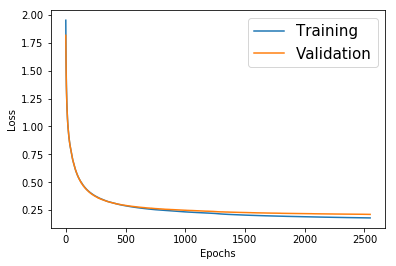

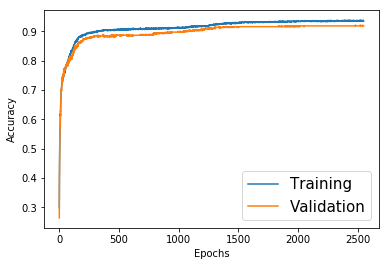

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist4).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist4).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist4.history['acc'])
plt.plot(hist4.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist4).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist4).eps', format='eps', dpi=1000)

In [40]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist5=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 1s 946us/step - loss: 2.0083 - acc: 0.2759 - val_loss: 1.9146 - val_acc: 0.3730
Epoch 2/3000
1131/1131 [==============================] - 0s 146us/step - loss: 1.8418 - acc: 0.4279 - val_loss: 1.8093 - val_acc: 0.3995
Epoch 3/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.7562 - acc: 0.4262 - val_loss: 1.7390 - val_acc: 0.4101
Epoch 4/3000
1131/1131 [==============================] - 0s 85us/step - loss: 1.6837 - acc: 0.4385 - val_loss: 1.6634 - val_acc: 0.4127
Epoch 5/3000
1131/1131 [==============================] - 0s 92us/step - loss: 1.6108 - acc: 0.4412 - val_loss: 1.5915 - val_acc: 0.4101
Epoch 6/3000
1131/1131 [==============================] - 0s 88us/step - loss: 1.5410 - acc: 0.4651 - val_loss: 1.5183 - val_acc: 0.5238
Epoch 7/3000
1131/1131 [==============================] - 0s 92us/step - loss: 1.4765 - acc: 0.5296 - val_loss: 1.4558 - val_acc:

Epoch 60/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.5149 - acc: 0.8470 - val_loss: 0.5236 - val_acc: 0.8307
Epoch 61/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.5068 - acc: 0.8550 - val_loss: 0.5102 - val_acc: 0.8333
Epoch 62/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.4991 - acc: 0.8515 - val_loss: 0.5052 - val_acc: 0.8333
Epoch 63/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.4911 - acc: 0.8568 - val_loss: 0.4981 - val_acc: 0.8439
Epoch 64/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.4857 - acc: 0.8621 - val_loss: 0.4900 - val_acc: 0.8492
Epoch 65/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.4787 - acc: 0.8541 - val_loss: 0.4858 - val_acc: 0.8492
Epoch 66/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.4727 - acc: 0.8568 - val_loss: 0.4750 - val_acc: 0.8519
Epoch 67/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 92us/step - loss: 0.3042 - acc: 0.8939 - val_loss: 0.3171 - val_acc: 0.8836
Epoch 119/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.3024 - acc: 0.8939 - val_loss: 0.3153 - val_acc: 0.8783
Epoch 120/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.3033 - acc: 0.8983 - val_loss: 0.3166 - val_acc: 0.8783
Epoch 121/3000
1131/1131 [==============================] - 0s 78us/step - loss: 0.3002 - acc: 0.8921 - val_loss: 0.3135 - val_acc: 0.8810
Epoch 122/3000
1131/1131 [==============================] - 0s 77us/step - loss: 0.2977 - acc: 0.8930 - val_loss: 0.3107 - val_acc: 0.8836
Epoch 123/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2960 - acc: 0.8983 - val_loss: 0.3136 - val_acc: 0.8810
Epoch 124/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2954 - acc: 0.8957 - val_loss: 0.3107 - val_acc: 0.8836
Epoch 125/3000
1131/1131 [================

1131/1131 [==============================] - 0s 81us/step - loss: 0.2429 - acc: 0.9027 - val_loss: 0.2675 - val_acc: 0.8942
Epoch 178/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2408 - acc: 0.9080 - val_loss: 0.2705 - val_acc: 0.8915
Epoch 179/3000
1131/1131 [==============================] - 0s 63us/step - loss: 0.2410 - acc: 0.9080 - val_loss: 0.2675 - val_acc: 0.8915
Epoch 180/3000
1131/1131 [==============================] - 0s 93us/step - loss: 0.2413 - acc: 0.9080 - val_loss: 0.2653 - val_acc: 0.8915
Epoch 181/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2386 - acc: 0.9080 - val_loss: 0.2654 - val_acc: 0.8942
Epoch 182/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2382 - acc: 0.9098 - val_loss: 0.2643 - val_acc: 0.8942
Epoch 183/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.2380 - acc: 0.9089 - val_loss: 0.2623 - val_acc: 0.8968
Epoch 184/3000
1131/1131 [================

Epoch 236/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2124 - acc: 0.9160 - val_loss: 0.2434 - val_acc: 0.8995
Epoch 237/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2119 - acc: 0.9169 - val_loss: 0.2432 - val_acc: 0.8995
Epoch 238/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2132 - acc: 0.9151 - val_loss: 0.2416 - val_acc: 0.9021
Epoch 239/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.2116 - acc: 0.9142 - val_loss: 0.2458 - val_acc: 0.9021
Epoch 240/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.2142 - acc: 0.9160 - val_loss: 0.2412 - val_acc: 0.8995
Epoch 241/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.2117 - acc: 0.9160 - val_loss: 0.2419 - val_acc: 0.8995
Epoch 242/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.2105 - acc: 0.9134 - val_loss: 0.2407 - val_acc: 0.8968
Epoch 243/3000
1131/1131 [=

Epoch 295/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1925 - acc: 0.9284 - val_loss: 0.2276 - val_acc: 0.9153
Epoch 296/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.1924 - acc: 0.9248 - val_loss: 0.2275 - val_acc: 0.9180
Epoch 297/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1951 - acc: 0.9248 - val_loss: 0.2275 - val_acc: 0.9101
Epoch 298/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1932 - acc: 0.9293 - val_loss: 0.2267 - val_acc: 0.9101
Epoch 299/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1984 - acc: 0.9231 - val_loss: 0.2264 - val_acc: 0.9153
Epoch 300/3000
1131/1131 [==============================] - 0s 84us/step - loss: 0.1904 - acc: 0.9266 - val_loss: 0.2255 - val_acc: 0.9180
Epoch 301/3000
1131/1131 [==============================] - 0s 83us/step - loss: 0.1917 - acc: 0.9248 - val_loss: 0.2253 - val_acc: 0.9153
Epoch 302/3000
1131/1131 [=

1131/1131 [==============================] - 0s 92us/step - loss: 0.1808 - acc: 0.9293 - val_loss: 0.2168 - val_acc: 0.9101
Epoch 354/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.1812 - acc: 0.9310 - val_loss: 0.2158 - val_acc: 0.9101
Epoch 355/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1820 - acc: 0.9275 - val_loss: 0.2159 - val_acc: 0.9153
Epoch 356/3000
1131/1131 [==============================] - 0s 79us/step - loss: 0.1807 - acc: 0.9302 - val_loss: 0.2159 - val_acc: 0.9206
Epoch 357/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.1787 - acc: 0.9284 - val_loss: 0.2158 - val_acc: 0.9153
Epoch 358/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1794 - acc: 0.9293 - val_loss: 0.2158 - val_acc: 0.9180
Epoch 359/3000
1131/1131 [==============================] - 0s 159us/step - loss: 0.1818 - acc: 0.9302 - val_loss: 0.2169 - val_acc: 0.9206
Epoch 360/3000
1131/1131 [==============

Epoch 412/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.1754 - acc: 0.9302 - val_loss: 0.2117 - val_acc: 0.9233
Epoch 413/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1701 - acc: 0.9337 - val_loss: 0.2072 - val_acc: 0.9206
Epoch 414/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1744 - acc: 0.9310 - val_loss: 0.2110 - val_acc: 0.9206
Epoch 415/3000
1131/1131 [==============================] - 0s 87us/step - loss: 0.1721 - acc: 0.9328 - val_loss: 0.2078 - val_acc: 0.9180
Epoch 416/3000
1131/1131 [==============================] - 0s 86us/step - loss: 0.1705 - acc: 0.9328 - val_loss: 0.2088 - val_acc: 0.9153
Epoch 417/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.1697 - acc: 0.9337 - val_loss: 0.2083 - val_acc: 0.9153
Epoch 418/3000
1131/1131 [==============================] - 0s 80us/step - loss: 0.1696 - acc: 0.9310 - val_loss: 0.2083 - val_acc: 0.9206
Epoch 419/3000
1131/1131 [=

1131/1131 [==============================] - 0s 88us/step - loss: 0.1625 - acc: 0.9337 - val_loss: 0.2089 - val_acc: 0.9259
Epoch 471/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1653 - acc: 0.9346 - val_loss: 0.2032 - val_acc: 0.9206
Epoch 472/3000
1131/1131 [==============================] - 0s 76us/step - loss: 0.1627 - acc: 0.9346 - val_loss: 0.2029 - val_acc: 0.9206
Epoch 473/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1621 - acc: 0.9355 - val_loss: 0.2066 - val_acc: 0.9233
Epoch 474/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1672 - acc: 0.9284 - val_loss: 0.2058 - val_acc: 0.9233
Epoch 475/3000
1131/1131 [==============================] - 0s 82us/step - loss: 0.1640 - acc: 0.9346 - val_loss: 0.2037 - val_acc: 0.9206
Epoch 476/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1626 - acc: 0.9337 - val_loss: 0.2022 - val_acc: 0.9206
Epoch 477/3000
1131/1131 [================

1131/1131 [==============================] - 0s 88us/step - loss: 0.1552 - acc: 0.9425 - val_loss: 0.2019 - val_acc: 0.9233
Epoch 530/3000
1131/1131 [==============================] - 0s 85us/step - loss: 0.1566 - acc: 0.9381 - val_loss: 0.2045 - val_acc: 0.9233
Epoch 531/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.1612 - acc: 0.9355 - val_loss: 0.2000 - val_acc: 0.9206
Epoch 532/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1553 - acc: 0.9390 - val_loss: 0.2005 - val_acc: 0.9206
Epoch 533/3000
1131/1131 [==============================] - 0s 159us/step - loss: 0.1579 - acc: 0.9355 - val_loss: 0.2013 - val_acc: 0.9286
Epoch 534/3000
1131/1131 [==============================] - 0s 156us/step - loss: 0.1614 - acc: 0.9337 - val_loss: 0.2006 - val_acc: 0.9233
Epoch 535/3000
1131/1131 [==============================] - 0s 166us/step - loss: 0.1569 - acc: 0.9381 - val_loss: 0.1994 - val_acc: 0.9206
Epoch 536/3000
1131/1131 [============

1131/1131 [==============================] - 0s 88us/step - loss: 0.1526 - acc: 0.9399 - val_loss: 0.1967 - val_acc: 0.9259
Epoch 588/3000
1131/1131 [==============================] - 0s 81us/step - loss: 0.1499 - acc: 0.9390 - val_loss: 0.1984 - val_acc: 0.9233
Epoch 00588: early stopping


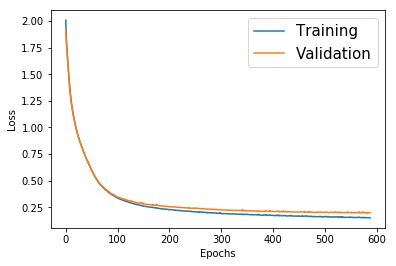

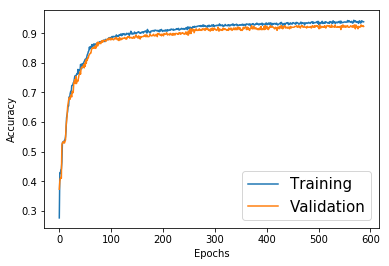

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist5).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist5).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist5.history['acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist5).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist5).eps', format='eps', dpi=1000)

In [42]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(9))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist6=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1131 samples, validate on 378 samples
Epoch 1/3000
1131/1131 [==============================] - 1s 1ms/step - loss: 2.0927 - acc: 0.2042 - val_loss: 1.9564 - val_acc: 0.2593
Epoch 2/3000
1131/1131 [==============================] - 0s 110us/step - loss: 1.8597 - acc: 0.3554 - val_loss: 1.7823 - val_acc: 0.2698
Epoch 3/3000
1131/1131 [==============================] - 0s 99us/step - loss: 1.6649 - acc: 0.4872 - val_loss: 1.5580 - val_acc: 0.5053
Epoch 4/3000
1131/1131 [==============================] - 0s 104us/step - loss: 1.4345 - acc: 0.5261 - val_loss: 1.3437 - val_acc: 0.5370
Epoch 5/3000
1131/1131 [==============================] - 0s 103us/step - loss: 1.2625 - acc: 0.5615 - val_loss: 1.1960 - val_acc: 0.5503
Epoch 6/3000
1131/1131 [==============================] - 0s 97us/step - loss: 1.1374 - acc: 0.6446 - val_loss: 1.1024 - val_acc: 0.6111
Epoch 7/3000
1131/1131 [==============================] - 0s 97us/step - loss: 1.0500 - acc: 0.6932 - val_loss: 1.0416 - val_acc:

Epoch 60/3000
1131/1131 [==============================] - 0s 96us/step - loss: 0.3584 - acc: 0.8736 - val_loss: 0.3770 - val_acc: 0.8757
Epoch 61/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.3591 - acc: 0.8744 - val_loss: 0.3570 - val_acc: 0.8571
Epoch 62/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.3552 - acc: 0.8665 - val_loss: 0.3609 - val_acc: 0.8624
Epoch 63/3000
1131/1131 [==============================] - 0s 98us/step - loss: 0.3530 - acc: 0.8709 - val_loss: 0.3507 - val_acc: 0.8598
Epoch 64/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.3500 - acc: 0.8718 - val_loss: 0.3476 - val_acc: 0.8571
Epoch 65/3000
1131/1131 [==============================] - 0s 90us/step - loss: 0.3499 - acc: 0.8674 - val_loss: 0.3464 - val_acc: 0.8757
Epoch 66/3000
1131/1131 [==============================] - 0s 96us/step - loss: 0.3436 - acc: 0.8718 - val_loss: 0.3532 - val_acc: 0.8651
Epoch 67/3000
1131/1131 [=========

1131/1131 [==============================] - 0s 99us/step - loss: 0.2666 - acc: 0.8957 - val_loss: 0.2773 - val_acc: 0.8995
Epoch 120/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2611 - acc: 0.9072 - val_loss: 0.2733 - val_acc: 0.8942
Epoch 121/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2605 - acc: 0.9063 - val_loss: 0.2742 - val_acc: 0.8783
Epoch 122/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2623 - acc: 0.9045 - val_loss: 0.2681 - val_acc: 0.8915
Epoch 123/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.2600 - acc: 0.9107 - val_loss: 0.2687 - val_acc: 0.8995
Epoch 124/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2571 - acc: 0.9116 - val_loss: 0.2799 - val_acc: 0.8810
Epoch 125/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.2604 - acc: 0.9036 - val_loss: 0.2657 - val_acc: 0.8862
Epoch 126/3000
1131/1131 [================

1131/1131 [==============================] - 0s 95us/step - loss: 0.2163 - acc: 0.9178 - val_loss: 0.2381 - val_acc: 0.9153
Epoch 179/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2149 - acc: 0.9213 - val_loss: 0.2477 - val_acc: 0.9021
Epoch 180/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2174 - acc: 0.9213 - val_loss: 0.2420 - val_acc: 0.9101
Epoch 181/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2186 - acc: 0.9169 - val_loss: 0.2349 - val_acc: 0.9180
Epoch 182/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.2149 - acc: 0.9222 - val_loss: 0.2379 - val_acc: 0.9101
Epoch 183/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.2136 - acc: 0.9178 - val_loss: 0.2268 - val_acc: 0.9233
Epoch 184/3000
1131/1131 [==============================] - 0s 93us/step - loss: 0.2123 - acc: 0.9222 - val_loss: 0.2314 - val_acc: 0.9153
Epoch 185/3000
1131/1131 [================

Epoch 237/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1872 - acc: 0.9293 - val_loss: 0.2445 - val_acc: 0.9048
Epoch 238/3000
1131/1131 [==============================] - 0s 131us/step - loss: 0.1895 - acc: 0.9310 - val_loss: 0.2043 - val_acc: 0.9206
Epoch 239/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1893 - acc: 0.9248 - val_loss: 0.2166 - val_acc: 0.9074
Epoch 240/3000
1131/1131 [==============================] - 0s 113us/step - loss: 0.1855 - acc: 0.9346 - val_loss: 0.2180 - val_acc: 0.9233
Epoch 241/3000
1131/1131 [==============================] - 0s 103us/step - loss: 0.1853 - acc: 0.9319 - val_loss: 0.2131 - val_acc: 0.9286
Epoch 242/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.1855 - acc: 0.9363 - val_loss: 0.2098 - val_acc: 0.9127
Epoch 243/3000
1131/1131 [==============================] - 0s 127us/step - loss: 0.1840 - acc: 0.9337 - val_loss: 0.2253 - val_acc: 0.9101
Epoch 244/3000
1131/1

1131/1131 [==============================] - 0s 99us/step - loss: 0.1712 - acc: 0.9355 - val_loss: 0.1966 - val_acc: 0.9180
Epoch 296/3000
1131/1131 [==============================] - 0s 92us/step - loss: 0.1749 - acc: 0.9346 - val_loss: 0.1979 - val_acc: 0.9180
Epoch 297/3000
1131/1131 [==============================] - 0s 88us/step - loss: 0.1753 - acc: 0.9372 - val_loss: 0.2293 - val_acc: 0.8995
Epoch 298/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.1760 - acc: 0.9275 - val_loss: 0.2070 - val_acc: 0.9206
Epoch 299/3000
1131/1131 [==============================] - 0s 93us/step - loss: 0.1718 - acc: 0.9355 - val_loss: 0.2096 - val_acc: 0.9180
Epoch 300/3000
1131/1131 [==============================] - 0s 95us/step - loss: 0.1736 - acc: 0.9346 - val_loss: 0.1979 - val_acc: 0.9153
Epoch 301/3000
1131/1131 [==============================] - 0s 138us/step - loss: 0.1750 - acc: 0.9337 - val_loss: 0.2001 - val_acc: 0.9153
Epoch 302/3000
1131/1131 [===============

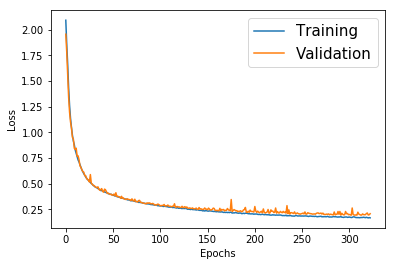

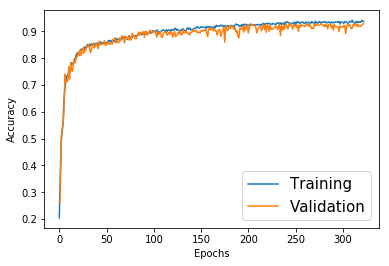

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist6).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist6).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist6.history['acc'])
plt.plot(hist6.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist6).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist6).eps', format='eps', dpi=1000)

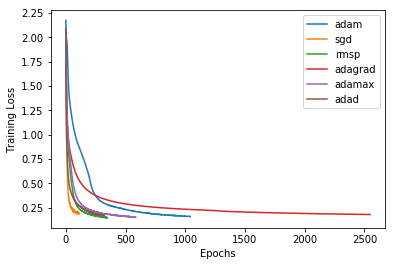

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(hist.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.plot(hist6.history['loss'])
plt.savefig('loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])

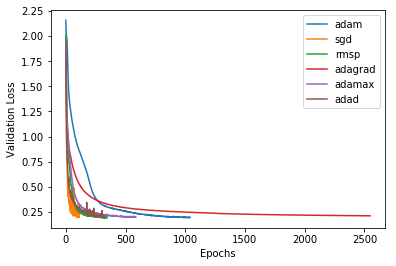

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
#plt.plot(hist1.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
#plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
#plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
#plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('Validation loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

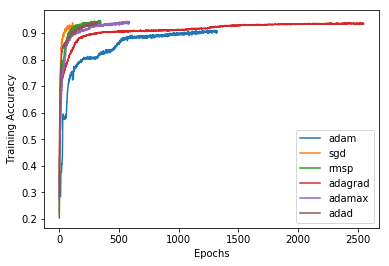

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
#plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['acc'])
#plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['acc'])
#plt.plot(hist5.history['val_loss'])
plt.plot(hist6.history['acc'])
#plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('training accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

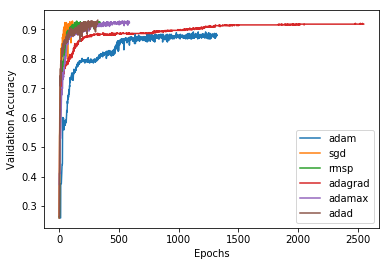

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.plot(hist6.history['val_acc'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('validation accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)